# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_org = pd.read_csv('26__titanic.csv', sep=",")

In [3]:
pd.set_option('display.max_rows', 26)
pd.set_option('display.min_rows', 26)

In [4]:
df_org.head(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"


In [5]:
df_org.tail(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_org.sample(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
668,3.0,0.0,"Barton, Mr. David John",male,22.0,0.0,0.0,324669,8.0500,NaN,S,NaN,NaN,"England New York, NY"
1179,3.0,0.0,"Sage, Mr. John George",male,NaN,1.0,9.0,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
789,3.0,0.0,"Elias, Mr. Dibo",male,NaN,0.0,0.0,2674,7.2250,NaN,C,NaN,NaN,NaN
865,3.0,0.0,"Henry, Miss. Delia",female,NaN,0.0,0.0,382649,7.7500,NaN,Q,NaN,NaN,NaN
843,3.0,0.0,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1.0,0.0,65304,19.9667,NaN,S,NaN,NaN,NaN
940,3.0,0.0,"Kraeff, Mr. Theodor",male,NaN,0.0,0.0,349253,7.8958,NaN,C,NaN,NaN,NaN
584,2.0,1.0,"Webber, Miss. Susan",female,32.5,0.0,0.0,27267,13.0000,E101,S,12,NaN,"England / Hartford, CT"
480,2.0,0.0,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1.0,2.0,SC/Paris 2123,41.5792,NaN,C,NaN,NaN,Paris / Haiti
589,2.0,1.0,"Wells, Mrs. Arthur Henry (""Addie"" Dart Trevaskis)",female,29.0,0.0,2.0,29103,23.0000,NaN,S,14,NaN,"Cornwall / Akron, OH"
671,3.0,0.0,"Berglund, Mr. Karl Ivar Sven",male,22.0,0.0,0.0,PP 4348,9.3500,NaN,S,NaN,NaN,"Tranvik, Finland New York"


In [7]:
df_org[df_org.isnull().all(axis=1)]   #sprawdzam czy sa jakies wiersze z samymi NaN

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_org.dropna(how='all', inplace=True)  #usuwam wiersze z samymi wartościami NaN

In [9]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.4+ KB


In [10]:
df_org['name'].duplicated().sum()

2

In [11]:
df_org[df_org['name'].duplicated(keep=False)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3.0,1.0,"Connolly, Miss. Kate",female,22.0,0.0,0.0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3.0,0.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN


In [12]:
df_org.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [13]:
df_org.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [14]:
df_org.describe().round(2)

,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.28,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


In [15]:
df_org[df_org['fare']==0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
70,1.0,0.0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0.0,0.0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
125,1.0,0.0,"Fry, Mr. Richard",male,NaN,0.0,0.0,112058,0.0,B102,S,NaN,NaN,NaN
150,1.0,0.0,"Harrison, Mr. William",male,40.0,0.0,0.0,112059,0.0,B94,S,NaN,110.0,NaN
170,1.0,1.0,"Ismay, Mr. Joseph Bruce",male,49.0,0.0,0.0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool
223,1.0,0.0,"Parr, Mr. William Henry Marsh",male,NaN,0.0,0.0,112052,0.0,NaN,S,NaN,NaN,Belfast
234,1.0,0.0,"Reuchlin, Jonkheer. John George",male,38.0,0.0,0.0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
363,2.0,0.0,"Campbell, Mr. William",male,NaN,0.0,0.0,239853,0.0,NaN,S,NaN,NaN,Belfast
384,2.0,0.0,"Cunningham, Mr. Alfred Fleming",male,NaN,0.0,0.0,239853,0.0,NaN,S,NaN,NaN,Belfast
410,2.0,0.0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0.0,0.0,239854,0.0,NaN,S,NaN,NaN,Belfast


In [16]:
# This algorithm inspects selected columns of DF to analyze their data types, unique values, and the count of unique values.

# Define a list of columns to inspect in the DF.
columns_to_inspect = ['pclass', 'survived', 'sibsp', 'parch', 'sex', 'embarked']

inspection_results = []

for column in columns_to_inspect:
    if column in df_org.columns:
        unique_values = df_org[column].dropna().unique()
        inspection_results.append({               
            "Column": column,                     # Name of the column.
            "Data Type": df_org[column].dtype,    # Data type of the column.
            "Unique Values": unique_values,       # List of unique non-NaN values.
            "Unique Count": len(unique_values),   # Number of unique values.
        })

inspection_df = pd.DataFrame(inspection_results)
inspection_df

,Column,Data Type,Unique Values,Unique Count
0,pclass,float64,"[1.0, 2.0, 3.0]",3
1,survived,float64,"[1.0, 0.0]",2
2,sibsp,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0]",7
3,parch,float64,"[0.0, 2.0, 1.0, 4.0, 3.0, 5.0, 6.0, 9.0]",8
4,sex,object,"[female, male]",2
5,embarked,object,"[S, C, Q]",3


### Dane w poszczególnych kolumnach są spójne i jednorodne.
3. Brak duplikatów.
4. Brak ewidentnie 'wadliwych' wartości w kolumnach, np.: 
    * kolumna `['age']` nie zawiera 'nie możliwego' wieku pasażera <= 0 ani 'podejrzanie starych' ludzi (wiek > 100 lat).
    * kolumna `['pclass']` zawiera tylko dopuszczalne/przewidziane wartości: `[1,2,3]` (określające klasę biletu podróży danego pasażera).
    * kolumna `['survived']` zawiera tylko dopuszczalne/przewidziane wartości: `[0,1]` (które oznaczają: 'not survived i 'survived').
    * kolumna `['sex']` zawiera dopuszczalne/przewidziane wartości: `['male','female']` (dodatkowo wszystkie są 'małymi' literami).
    * kolumny `['sibsp','parch']` wartości mieszczą się w granicach <0,9>, a więc nie budzących 'podejrzeń'. Ponadto po spr. dwóch konkretnych zbiorów rekordów dane `['sibsp','parch']` prawidłowo się pokrywają (tzn. ilości osób w rodzinach z danymi w kolumnach `['sibsp','parch']`.
    * kolumna `['embarked']` zawiera tylko dopuszczalne/przewidziane wartości: `['S','C','Q']` (odnoszące się do miast 'zaokrętowania' pasażerów, wszystkie wartości są tylko 'dużymi literami').
    * 'Braki' w kolumnie `['age']` wymagają uzupełnienia.
    * 'Braki' w pozostałych kolumnach `['boat','body','home.dest']` są naturalne lub nie sposób ich sensownie uzupełnić. W `['boat']` brak wartości najczęściej jest wynikiem tego, że pasażerowi nie udało się wsiąść na żadną szalupę (ilość szalup była mocno ograniczona). Podobnie `['body']` braki są wynikiem 'przeżycia' pasazera (więc brak nr ciała jest absolutnie logiczna) lub nieodnalezienia/braku identyfikacji ciała.

## Opierając się na wstępnej analizie danych, podejmuję następujące decyzje dt. szczegółowej analizy.

* będę badał przede wszystkim wpływ wieku, klasy podróży oraz płci na 'SR' pasażerów.
* usuwam kolumny: `['ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']` jako nie mające wpływu na 'SR' pasażerów. Albo będące 'konsekwencją' wydarzeń `([body, boat])` albo pozostające ściśle powiązane z inną kolumną `['pclass','ticket')`, są to kolumny: `['fare', 'cabin']`. Kolumne `['home.dest']` odrzucam, bo ma dużo brakujących wartości, a istniejące wartości są b. różnorodne i nienumeryczne co b. utrudnia ich sensowne 'grupowanie' co pozwoliłoby na jakąkolwiek analize (dodatkowo 'nie widzę' żadnego związku pomiędzy celem podróży, a 'SR').
* braki w kolumnie `['age']` będą uzupełniane średnią/medianą według 'grup pasażerów' (które będę tworzył w kolejnych krokach analizy).
* braki w pozostałych kolumnach `['boat','body','home.dest']` są naturalne lub nie sposób ich sensownie uzupełnić. W `['boat']` brak wartości najczęściej jest wynikiem tego, że pasażerowi nie udało się wsiąść na żadną szalupę (ilość szalup była mocno ograniczona). Podobnie `['body']` braki są wynikiem 'przeżycia' pasazera (więc brak nr ciała jest absolutnie logiczna) lub nieodnalezienia/braku identyfikacji ciała.
* zmieniam typ danych kolumn: `['pclass', 'survived', 'sibsp', 'parch', 'sex',]` z float64 na int32.

In [17]:
df_work = df_org.copy()  #kopia robocza DF

In [18]:
df_work.sample(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1160,3.0,0.0,"Rouse, Mr. Richard Henry",male,50.0,0.0,0.0,A/5 3594,8.0500,NaN,S,NaN,NaN,NaN
641,3.0,1.0,"Asplund, Master. Edvin Rojj Felix",male,3.0,4.0,2.0,347077,31.3875,NaN,S,15,NaN,"Sweden Worcester, MA"
672,3.0,0.0,"Betros, Master. Seman",male,NaN,0.0,0.0,2622,7.2292,NaN,C,NaN,NaN,NaN
71,1.0,0.0,"Clark, Mr. Walter Miller",male,27.0,1.0,0.0,13508,136.7792,C89,C,NaN,NaN,"Los Angeles, CA"
836,3.0,0.0,"Gustafsson, Mr. Alfred Ossian",male,20.0,0.0,0.0,7534,9.8458,NaN,S,NaN,NaN,"Waukegan, Chicago, IL"
432,2.0,1.0,"Harris, Mr. George",male,62.0,0.0,0.0,S.W./PP 752,10.5000,NaN,S,15,NaN,London
1162,3.0,1.0,"Ryan, Mr. Edward",male,NaN,0.0,0.0,383162,7.7500,NaN,Q,14,NaN,NaN
1181,3.0,0.0,"Salander, Mr. Karl Johan",male,24.0,0.0,0.0,7266,9.3250,NaN,S,NaN,NaN,NaN
74,1.0,0.0,"Clifford, Mr. George Quincy",male,NaN,0.0,0.0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA"
389,2.0,0.0,"de Brito, Mr. Jose Joaquim",male,32.0,0.0,0.0,244360,13.0000,NaN,S,NaN,NaN,"Portugal / Sau Paulo, Brazil"


In [19]:
df_work = df_work.drop(columns=['ticket'])
df_work = df_work.drop(columns=['fare'])
df_work = df_work.drop(columns=['cabin'])
df_work = df_work.drop(columns=['embarked'])
df_work = df_work.drop(columns=['boat'])
df_work = df_work.drop(columns=['body'])
df_work = df_work.drop(columns=['home.dest'])

In [20]:
df_work.describe().round(2)

,pclass,survived,age,sibsp,parch
count,1309.00,1309.00,1046.00,1309.00,1309.00
mean,2.29,0.38,29.88,0.50,0.39
std,0.84,0.49,14.41,1.04,0.87
min,1.00,0.00,0.17,0.00,0.00
25%,2.00,0.00,21.00,0.00,0.00
50%,3.00,0.00,28.00,0.00,0.00
75%,3.00,1.00,39.00,1.00,0.00
max,3.00,1.00,80.00,8.00,9.00


In [21]:
df_work.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
dtype: int64

In [22]:
df_work.sample(12)

,pclass,survived,name,sex,age,sibsp,parch
442,2.0,0.0,"Hickman, Mr. Leonard Mark",male,24.0,2.0,0.0
1234,3.0,0.0,"Sutehall, Mr. Henry Jr",male,25.0,0.0,0.0
388,2.0,1.0,"Davis, Miss. Mary",female,28.0,0.0,0.0
170,1.0,1.0,"Ismay, Mr. Joseph Bruce",male,49.0,0.0,0.0
1260,3.0,1.0,"Turja, Miss. Anna Sofia",female,18.0,0.0,0.0
771,3.0,1.0,"Devaney, Miss. Margaret Delia",female,19.0,0.0,0.0
356,2.0,0.0,"Butler, Mr. Reginald Fenton",male,25.0,0.0,0.0
940,3.0,0.0,"Kraeff, Mr. Theodor",male,NaN,0.0,0.0
811,3.0,0.0,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1.0,3.0
306,1.0,0.0,"White, Mr. Percival Wayland",male,54.0,0.0,1.0


## Uzupełnianie brakujących danych.
* Obecnie 'Braki' są tylko w kolumnie: `['age']`.
* W kolumnie `['age']` będę uzupełniał braki medianą obliczoną dla grup opartych na groupby('pclass', 'title'), 'title' wyodrębnię z kolumny `['name']`.
* 'Title' "niosą" ze sobą dodatkowe informacje o pasażerach i wpływają na dokładniejsze przyblizenie wieku pasażerów. Informują o statusie, stanie małżeńskim, zakresie wieku. Przykładowo 'Master' (dziś już praktycznie nie używane) odnosiło się do chłopców do osiągnięcia wieku 18 lat lub do czasu zaślubin. 

In [23]:
# Function to split the name into surname, title, and first name
def split_full_name(name):
    if pd.notnull(name):
        parts = name.split(",")
        if len(parts) > 1:
            surname = parts[0].strip()
            title_and_name = parts[1].strip().split(".")
            if len(title_and_name) > 1:
                title = title_and_name[0].strip()
                first_name = title_and_name[1].strip()
                return surname, title, first_name
    return None, None, None

# Apply the function to split the names into three components
df_work['surname'], df_work['title'], df_work['firstname'] = zip(*df_work['name'].apply(split_full_name))

df_work[['name', 'surname', 'title', 'firstname']].head()

,name,surname,title,firstname
0,"Allen, Miss. Elisabeth Walton",Allen,Miss,Elisabeth Walton
1,"Allison, Master. Hudson Trevor",Allison,Master,Hudson Trevor
2,"Allison, Miss. Helen Loraine",Allison,Miss,Helen Loraine
3,"Allison, Mr. Hudson Joshua Creighton",Allison,Mr,Hudson Joshua Creighton
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Allison,Mrs,Hudson J C (Bessie Waldo Daniels)


In [24]:
df_work['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [25]:
# zmieniam wyglądający na błędny tytuł 'Ms' na 'Miss'

df_work['name'] = df_work['name'].str.replace(' Ms.', ' Miss.', regex=False)
df_work['title'] = df_work['title'].str.replace('Ms', 'Miss', regex=False)

In [26]:
df_title = df_work.groupby(['title', 'pclass'])['age'].median().reset_index().round(1)
df_title[df_title['pclass']==1].T

,0,1,2,3,4,6,7,8,9,12,15,16,17,20,24,25
title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Sir,the Countess
pclass,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
age,70.0,54.5,40.0,39.0,49.0,38.0,48.0,48.5,6.0,30.0,24.0,24.0,41.5,45.0,49.0,33.0


In [27]:
df_title[df_title['pclass']==2].T

,5,10,13,18,21,23
title,Dr,Master,Miss,Mr,Mrs,Rev
pclass,2.0,2.0,2.0,2.0,2.0,2.0
age,38.5,2.0,20.0,30.0,30.5,41.5


In [28]:
df_title[df_title['pclass']==3].T

,11,14,19,22
title,Master,Miss,Mr,Mrs
pclass,3.0,3.0,3.0,3.0
age,6.0,18.0,26.0,31.0


In [29]:
# a function for filling missing values
def fill_missing_values(df_func, target_column, group_columns, metric='median'):

    # Calculate group statistics
    if metric == 'median':
        group_stats = df_func.groupby(group_columns)[target_column].median()
    elif metric == 'mean':
        group_stats = df_func.groupby(group_columns)[target_column].mean()
    
    # a function for filling missing values
    def fill_row(row):
        if pd.isna(row[target_column]):
            return group_stats[row[group_columns[0]], row[group_columns[1]]]
        return row[target_column]
    
    df_func[target_column] = df_func.apply(fill_row, axis=1)
    return df_func

# Use the function for the DF, (groupby ['title','pclass']) missing values will be filling with median of age for these group
df_work = fill_missing_values(df_work, target_column='age', group_columns=['title', 'pclass'], metric='median')

df_work['age'].isnull().sum()

0

In [30]:
# converting columns z float64 to int32
columns_to_convert = ['pclass', 'survived', 'sibsp', 'parch']
df_work[columns_to_convert] = df_work[columns_to_convert].astype('int32')
df_work.dtypes

pclass         int32
survived       int32
name          object
sex           object
age          float64
sibsp          int32
parch          int32
surname       object
title         object
firstname     object
dtype: object

In [31]:
df_work.to_csv('titanic_df_work_clean.csv', index=False)

## EDA krok 3
#### Analiza pojedyńczych kolumn (Univariate Analysis). 

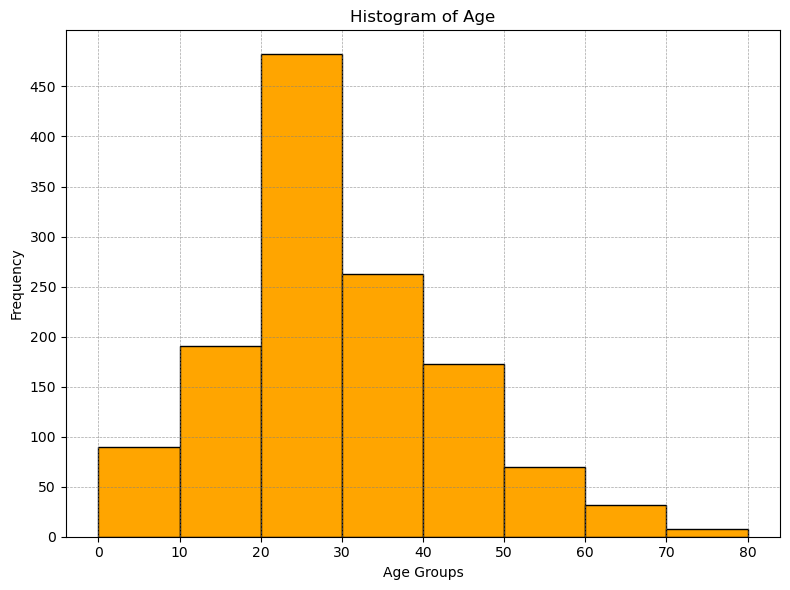

In [32]:
# Define custom bins
binsy = np.arange(0, df_work['age'].max() + 10, 10)  # Intervals with a width of 10 years

plt.figure(figsize=(8, 6))
df_work['age'].dropna().hist(bins=binsy, edgecolor='black', color='orange')
plt.title('Histogram of Age')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')

# Set Y-axis ticks at intervals of 50
plt.yticks(range(0, 500, 50))

plt.xticks(fontsize=10)
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


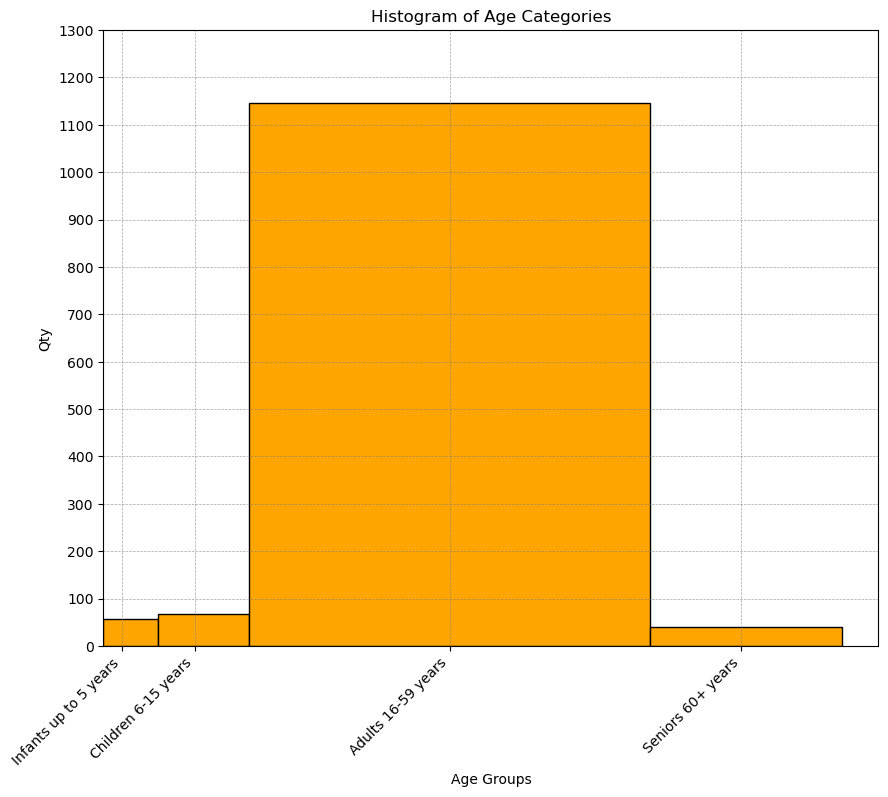

In [33]:
binsy = [0, 6, 16, 60, df_work['age'].max()+1]  # bins of age

labels = ['Infants up to 5 years', 'Children 6-15 years', 'Adults 16-59 years', 'Seniors 60+ years']

plt.figure(figsize=(10, 8))
df_work['age'].dropna().hist(bins=binsy, edgecolor='black', color='orange')
plt.title('Histogram of Age Categories')
plt.xlabel('Age Groups')
plt.ylabel('Qty')

# x-ticks midpoints
plt.xticks(
    [2, 10, 38, (60 + df_work['age'].max()) / 2],
    labels,
    ha='right',
    fontsize=10,
    rotation=45,
    color='black'
)
plt.yticks(
    range(0, int(df_work['age'].dropna().count() + 1), 100),  # Tick positions
    fontsize=10
)

plt.xlim(left=0)  # Ensure the X-axis starts at 0
plt.ylim(bottom=0)  # Ensure the Y-axis starts at 0

plt.grid(True, which='major', axis='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

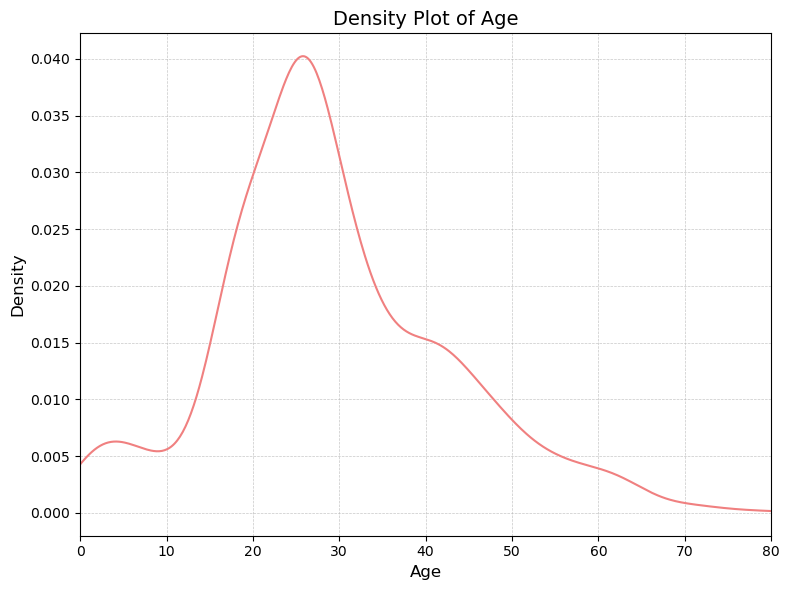

In [34]:
# Plot 2: Kernel Density Estimate (KDE)
plt.figure(figsize=(8, 6))
df_work['age'].dropna().plot(kind='kde', color='lightcoral', linewidth=1.5)
plt.title('Density Plot of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0, df_work['age'].max())
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig('titanic_density_plot_age.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
df_work[['age']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,1309.0,29.27,13.45,0.17,21.0,26.0,36.5,80.0


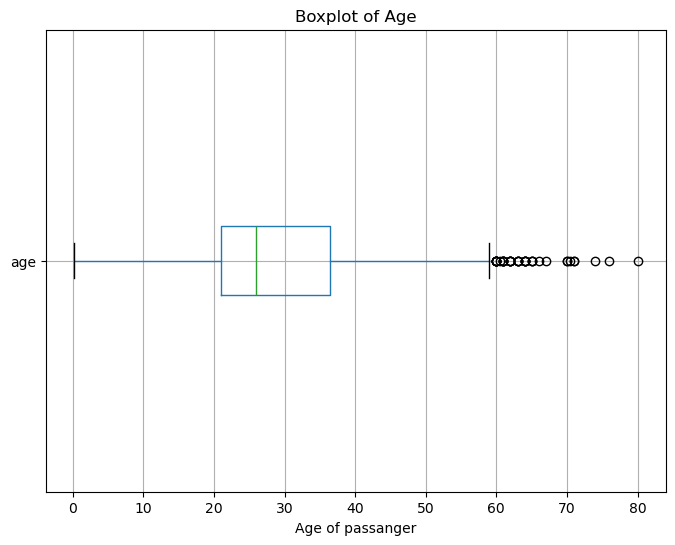

In [36]:
# Plot 3: Boxplot
plt.figure(figsize=(8, 6))
df_work.boxplot(column='age', vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age of passanger')
plt.grid(True)
plt.show()

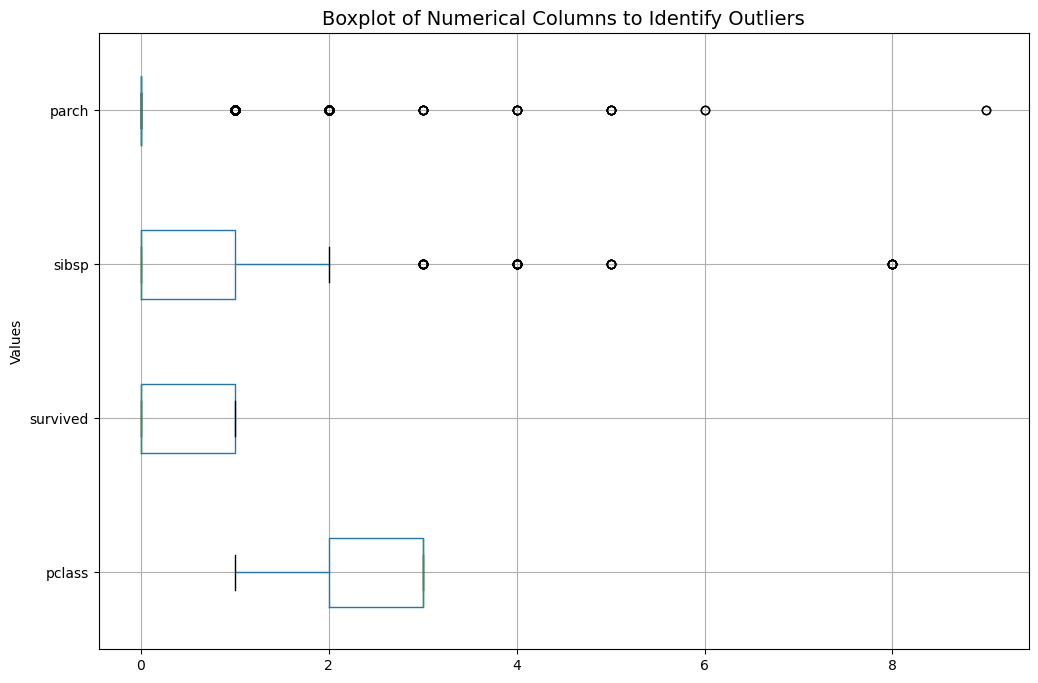

In [37]:
# Analyze numerical columns for outliers
numerical_columns = ['pclass', 'survived',  'sibsp', 'parch']
plt.figure(figsize=(12, 8))
df_work.boxplot(column=numerical_columns, vert=False)
plt.title("Boxplot of Numerical Columns to Identify Outliers", fontsize=14)
plt.ylabel("Values")
plt.xticks(rotation=0)
plt.show()

In [38]:
df_work['parch'].dropna().value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

In [39]:
df_work['sibsp'].dropna().value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

In [40]:
# Assigning 'family' column based on family members sibsp,parch
df_work['family'] = df_work.apply(
    lambda row: 'Yes' if row['sibsp'] > 0 or row['parch'] > 0 else 'No', axis=1
)

In [41]:
same_ticket_df = df_org[df_org['ticket'].isin(df_org['ticket'][df_org['ticket'].duplicated()])]
df_no_family_with_company = same_ticket_df[df_work['family']=='No']

C:\Users\dave\AppData\Local\Temp\ipykernel_19468\4068259954.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_family_with_company = same_ticket_df[df_work['family']=='No']


In [48]:
family_counts = pd.Series({
    'no Family': ((df_work['parch'] == 0)&(df_work['sibsp']==0)).sum(),
    'with Family': ((df_work['parch'] > 0)|(df_work['sibsp'] > 0)).sum(),
    'no Company': ((df_work['parch'] == 0)&(df_work['sibsp']==0)).sum() - df_no_family_with_company.shape[0],
    'with Company': df_no_family_with_company.shape[0],
#    'parch': ((df_work['parch'] > 0)&(df_work['sibsp']==0)).sum(),
#    'sibsp': ((df_work['parch'] == 0)&(df_work['sibsp'] > 0)).sum()
})

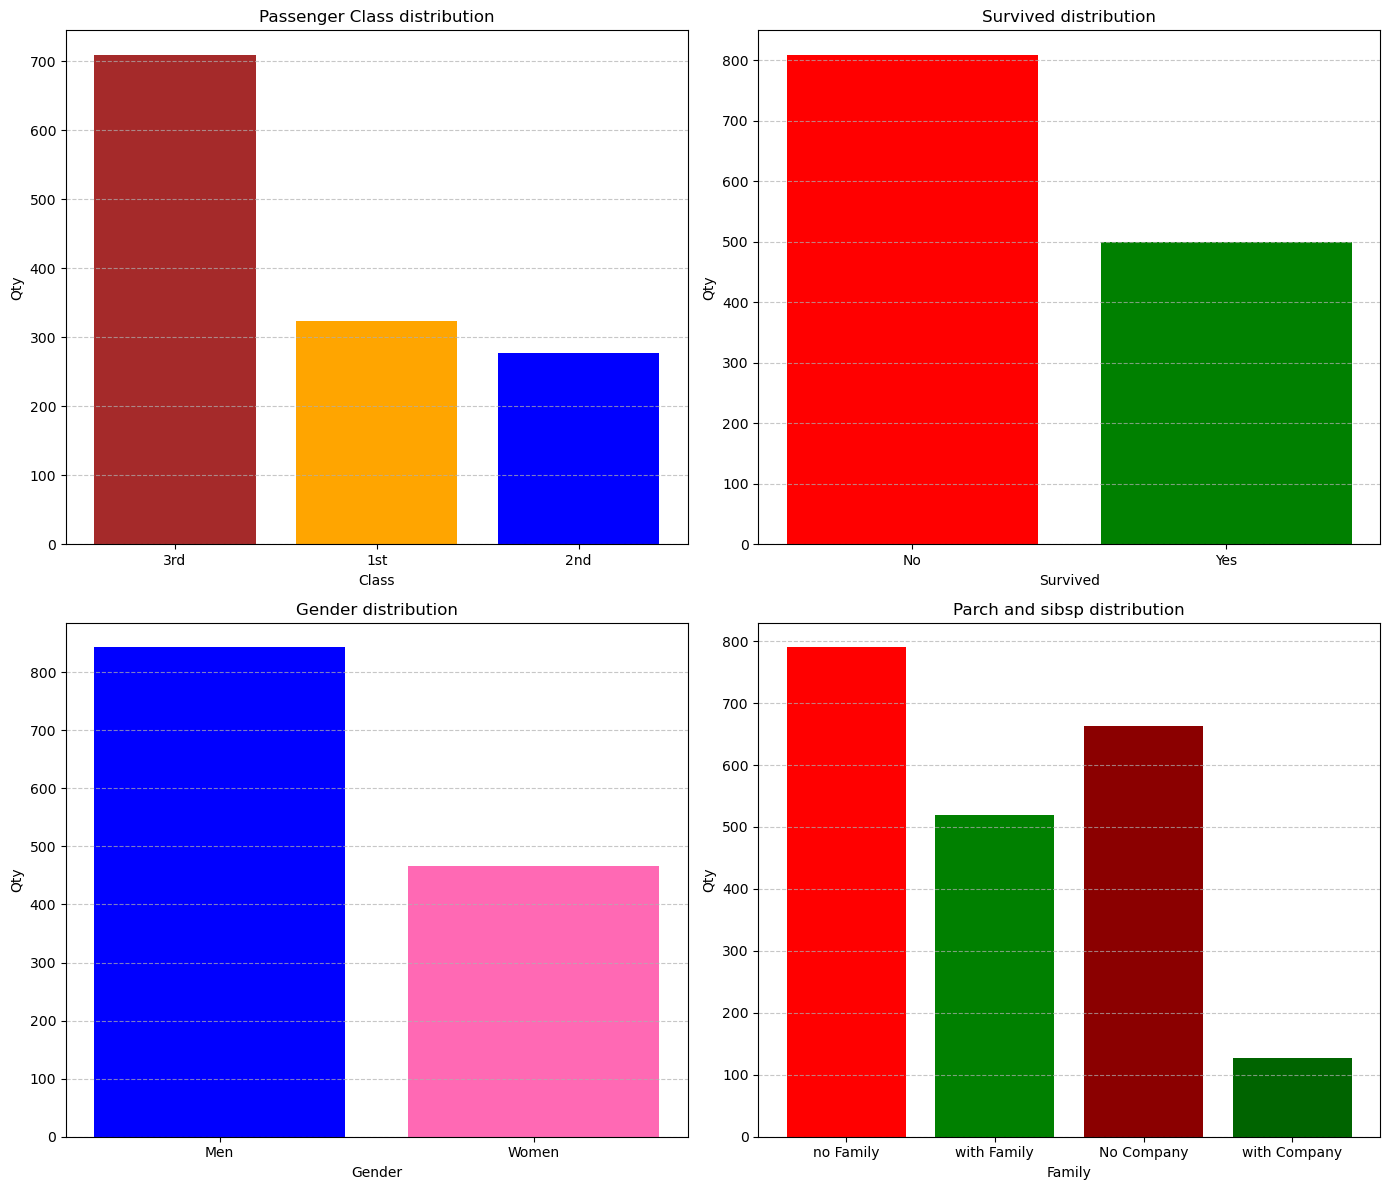

In [43]:
# Bar Plots with Custom Axis Labels

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Bar Plot for 'pclass'

pclass_counts = df_work['pclass'].value_counts()
axes[0, 0].bar(['3rd', '1st', '2nd'], pclass_counts.values, color=['brown', 'orange', 'blue'])
axes[0, 0].set_title('Passenger Class distribution')
axes[0, 0].set_xlabel('Class')
axes[0, 0].set_ylabel('Qty')
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar Plot for 'survived'

survived_counts = df_work['survived'].value_counts()
axes[0, 1].bar(['No', 'Yes'], survived_counts.values, color=['red', 'green'])
axes[0, 1].set_title('Survived distribution')
axes[0, 1].set_xlabel('Survived')
axes[0, 1].set_ylabel('Qty')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Bar Plot for 'sex'

sex_counts = df_work['sex'].value_counts()
axes[1, 0].bar(['Men', 'Women'], sex_counts.values, color=['blue', 'hotpink'])
axes[1, 0].set_title('Gender distribution')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Qty')
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar Plot for 'family'

family_counts = pd.Series({
    'no Family': ((df_work['parch'] == 0)&(df_work['sibsp']==0)).sum(),
    'with Family': ((df_work['parch'] > 0)|(df_work['sibsp'] > 0)).sum(),
    'no Company': ((df_work['parch'] == 0)&(df_work['sibsp']==0)).sum() - df_no_family_with_company.shape[0],
    'with Company': df_no_family_with_company.shape[0]
})

axes[1, 1].bar(['no Family', 'with Family', 'No Company', 'with Company'], family_counts.values, color=['red', 'green', 'darkred', 'darkgreen'])
axes[1, 1].set_title('Parch and sibsp distribution')
axes[1, 1].set_xlabel('Family')
axes[1, 1].set_ylabel('Qty')
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

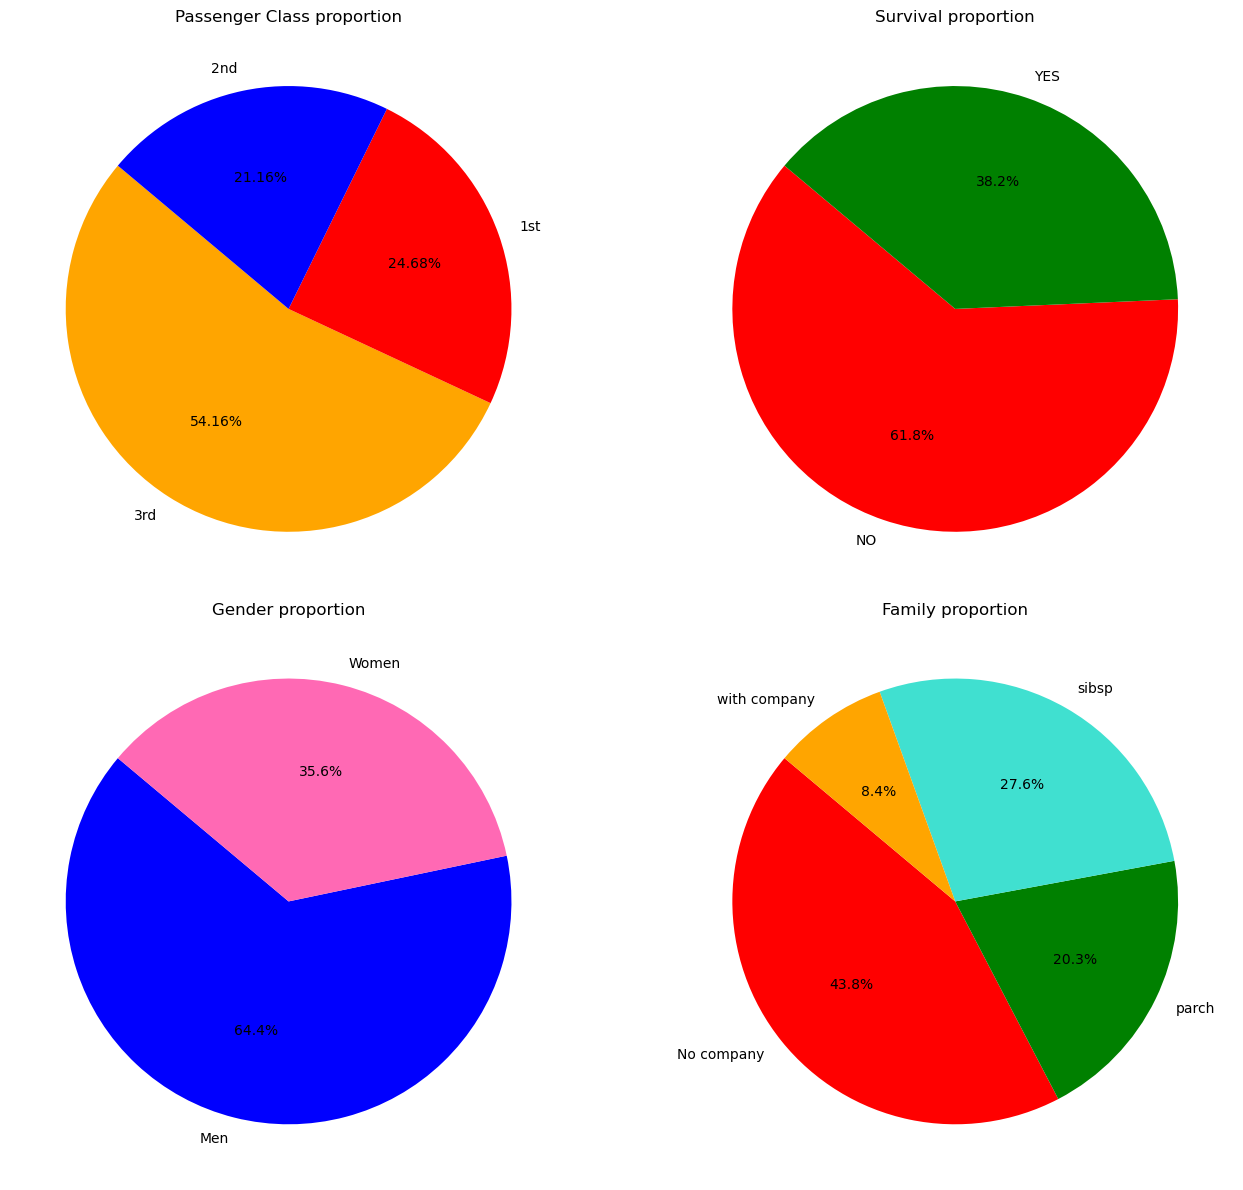

In [44]:
# Pie Charts (for: pclass, sex, survived, embarked)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Pie Chart for 'pclass'
pclass_counts = df_work['pclass'].dropna().value_counts()
axes[0, 0].pie(pclass_counts, labels=['3rd','1st','2nd'], #pclass_counts.index.astype(str),
               autopct='%1.2f%%', startangle=140, colors=['orange', 'red', 'blue'])
axes[0, 0].set_title('Passenger Class proportion')

# Pie Chart for 'survived'
survived_counts = df_work['survived'].dropna().value_counts()
axes[0, 1].pie(survived_counts, labels=['NO', 'YES'],
               autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
axes[0, 1].set_title('Survival proportion')

# Pie Chart for 'sex'
sex_counts = df_work['sex'].dropna().value_counts()
axes[1, 0].pie(sex_counts, labels=['Men', 'Women'],
               autopct='%1.1f%%', startangle=140, colors=['blue', 'hotpink'])
axes[1, 0].set_title('Gender proportion')

# Pie Chart for 'family'

family_counts = pd.Series({
    'No company': ((df_work['parch'] == 0)&(df_work['sibsp']==0)).sum() - df_no_family_with_company.shape[0],
    'parch': (df_work['parch'] > 0).sum(),
    'sibsp': (df_work['sibsp'] > 0).sum(),
    'with company': df_no_family_with_company.shape[0]
})

axes[1, 1].pie(family_counts, labels=['No company', 'parch', 'sibsp', 'with company'],
               autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'turquoise', 'orange'])
axes[1, 1].set_title('Family proportion')

plt.tight_layout()
plt.show()

In [51]:
rate_no_family = family_counts['no Family'] / df_work.shape[0]
rate_no_family = (rate_no_family*100).round(1)
print(f"Rate of 'no Family' passenger: {rate_no_family} %")

rate_no_company = family_counts['no Company'] / df_work.shape[0]
rate_no_company = (rate_no_company*100).round(1)
print(f"Rate of 'no Company' passenger: {rate_no_company} %")
family_counts.reset_index()

Rate of 'no Family' passenger: 60.4 %
Rate of 'no Company' passenger: 50.6 %


,index,0
0,no Family,790
1,with Family,519
2,no Company,663
3,with Company,127


# PODSUMOWANIE analizy pojedyńczych kolumn.
#### 1. Główne maksimum kolumny `[age]` (szczyt gęstości) jest w przedziale wieku 20–35 lat.
#### 2. Wykres gęstości wieku jest jednopikowy (monomodalny), co wskazuje, że większość pasażerów znajduje się w jednym przedziale wiekowym.
#### 3. Widać delikatny wzrost w kierunku niższych przedziałów wiekowych (np. dzieci poniżej 10 lat), ale nie jest on znaczący w porównaniu do głównego szczytu.
#### 4. Po 40. roku życia widoczny jest stopniowy spadek gęstości, co pokazuje, że liczba pasażerów w starszych grupach wiekowych była znacznie mniejsza.
#### 5. Analiza wykresów pudełkowych oraz IQR potwierdziła brak istotnych wartości odstających.
#### 6. Analiza pozostałych kolumn `[sex, pclass, survived, sibsp, parch]`
* #####  `[sex]`: Kobiety (dorosłe i dziewczynki) stanowią mniejszość wśród pasażerów (ok. 36%), mężczyźni (dorośli i chłopcy) stanowili większość (ok. 64%).
* ##### `[pclass]`: Trzecia klasa biletów dominuje (ok. 54%), a druga klasa jest najmniej liczna (ok. 21%).
* ##### `[survived]`: Ogólna przeżywalność wynosi (ok. 38%), większość pasażerów nie przeżyła katastrofy (ok. 62%).
* ##### `[sibsp i parch]`: Większość pasażerów podróżowała bez bliskiej rodziny (ok. 60%) (rodzeństwa, rodziców czy dzieci). Uwzględniając wyniki dot. pasażerów podróżujących na wspólnych biletach, ale nie pozostających w bliskim pokrewieństwie, okazuje się, że pasażerów podróżujących samotnie było (ok. 51%).

# Analiza SR ('Survival Rate') dla pojedyńczych faktorów.
## Analiza będzie opierać się na kilku kryteriach:
* #### wieku pasażerów
* #### klasie biletów
* #### płci pasażerów
* #### obecności osób współtowarzyszących (lub ich braku)

### Jako kryterium podziału na grupy  wiekowe, przyjąłem:
* #### standardowe obecnie kryteria podziału społeczeństwa
    * ##### grupa `['category']`
* #### subiektywnie dobrane kryterium uwzględniające uwarunkowania społeczne z początku XX w. 
    * ##### grupa `['subcategory']`
* #### dodatkowo podziele pasażerów na 8 grup "n-latków"
    * ##### grupa `['age_group']` 

### Na początek analizy SR sprawdzę ilu pasażerów przeżyło, a nie mają przypisanej szalupy.

In [52]:
df_survived_no_boat = df_org[(df_org['survived']==1)&(df_org['boat'].isna())]
df_survived_no_boat.shape[0]

23

##### Takich pasażerów jest <5%, więc wniosek jaki się nasuwa to, że przeżycie było uwarunkowane dostaniem się do szalupy (w praktyce bez szalupy przeżyły kilka osób).

In [53]:
# Function to categorize passengers based on age and sex

def assign_categories(row):
    # Group categorization
    if row['age'] < 18:
        row['category'] = 'Children'
    elif row['sex'] == 'female' and row['age'] >= 60:
        row['category'] = 'Seniors'
    elif row['sex'] == 'male' and row['age'] >= 65:
        row['category'] = 'Seniors'
    else:
        row['category'] = 'Adults'


    # Subgroup categorization
    if row['age'] < 6:
        row['subcategory'] = 'Infants'
    elif row['age'] < 16:
        row['subcategory'] = 'Children'    
    elif row['sex'] == 'female' and row['age'] >= 62:
        row['subcategory'] = 'Seniors'
    elif row['sex'] == 'male' and row['age'] >= 68:
        row['subcategory'] = 'Seniors'
    else:
        row['subcategory'] = 'Adults'
    return row

# Applying the function to categorize passengers
df_work = df_work.apply(assign_categories, axis=1)

In [54]:
# Define age bins and labels for grouping, lists, dictionaries and other helpfull staff (do wielokrotnego wykorzystywania)  

age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 81] # Define ranges
age_labels = ['Toddlers', 'Teens', 'Twenties', 'Thirties', 'Forties', 'Fifties', 'Sixties', 'Seventies']

pclass_replace = {1: '1st', 2: '2nd', 3: '3rd'}
sex_replace = {'female': 'Women', 'male': 'Men'}
category_replace = {
    "Adults": "Adults (19-59)",
    "Children": "Children (up to 18)",
    "Seniors": "Seniors (60+ women/65+ men)"
}

subcategory_replace = {
    "Infants": "Infants (up to 5)",
    "Children": "Children (6-15)",
    "Adults": "Adults (16-59)",
    "Seniors": "Seniors (62+ women/68+ men)"
}

family_colors = {"Yes": "green", "No": "red"}
survived_colors = {1: "green", 0: "red"}
gender_colors = {'female': 'hotpink', 'male': 'blue'}
pclass_colors = {'1st': "orange", '2nd': "grey", '3rd': "red"}
sex_colors = {'Women': "hotpink", 'Men': "blue"}
category_colors={'Adults':'brown', 'Children': 'gold', 'Seniors': 'grey'}

In [55]:
# SR by 'pclass'

SR_pclass = df_work.groupby('pclass')['survived'].agg(
    SR='mean',
    Amount_Survived='sum',
    Amount_All='count'
).reset_index()

SR_pclass = SR_pclass.replace(pclass_replace)
SR_pclass['SR'] = (SR_pclass['SR'] * 100).round(1)
SR_pclass.rename(columns={'pclass': 'Ticket Class', 'SR': 'Survival rate (%)', 'Amount_All':'Amount of All', 'Amount_Survived':'Amount of Survived'}, inplace=True)

# SR by 'sex'

SR_sex = df_work.groupby('sex')['survived'].agg(
    SR='mean', 
    Amount_Survived='sum',
    Amount_All='count'
).reset_index()

SR_sex['SR'] = (SR_sex['SR'] * 100).round(1)
SR_sex['sex'] = SR_sex['sex'].replace(sex_replace)

SR_sex.rename(columns={'sex': 'Gender', 'SR': 'Survival rate (%)', 'Amount_All':'Amount of All', 'Amount_Survived':'Amount of Survived'}, inplace=True)

In [56]:
# SR by 'age group'

agegroup = pd.cut(df_work['age'], bins=age_bins, right=False, labels=age_labels)  # Create an agegroup
SR_age_group = df_work.groupby(agegroup)['survived'].agg(
    SR='mean',  
    Amount_Survived='sum',
    Amount_All='count'
).reset_index()

SR_age_group['SR'] = (SR_age_group['SR'] * 100).round(1)
SR_age_group.rename(columns={'age': 'Age Group', 'SR': 'Survival rate (%)', 'Amount_All':'Amount of All', 'Amount_Survived':'Amount of Survived'}, inplace=True)

# SR by 'category'

SR_category = df_work.groupby('category')['survived'].agg(
    SR='mean', 
    Amount_Survived='sum',
    Amount_All='count'
).reset_index()

SR_category['SR'] = (SR_category['SR'] * 100).round(1)
#SR_category['category'] = SR_category['category'].replace(category_replace)

SR_category.rename(columns={
    'category': 'Demographic Group',
    'SR': 'Survival rate (%)',
    'Amount_All':'Amount of All',
    'Amount_Survived':'Amount of Survived'
}, inplace=True)

desired_order = ['Demographic Group', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
SR_category = SR_category[desired_order]

# SR by 'subcategory'

SR_subcategory = df_work.groupby('subcategory')['survived'].agg(
    SR='mean', 
    Amount_Survived='sum',
    Amount_All='count'
).reset_index()

SR_subcategory['SR'] = (SR_subcategory['SR'] * 100).round(1)
#SR_subcategory['subcategory'] = SR_subcategory['subcategory'].replace(subcategory_replace)

SR_subcategory.rename(columns={
    'subcategory': 'Demographic Subgroup',
    'SR': 'Survival rate (%)',
    'Amount_All':'Amount of All',
    'Amount_Survived':'Amount of Survived'
}, inplace=True)

In [57]:
SR_pclass

,Ticket Class,Survival rate (%),Amount of Survived,Amount of All
0,1st,61.9,200,323
1,2nd,43.0,119,277
2,3rd,25.5,181,709


In [58]:
SR_sex

,Gender,Survival rate (%),Amount of Survived,Amount of All
0,Women,72.7,339,466
1,Men,19.1,161,843


In [59]:
SR_category

,Demographic Group,Survival rate (%),Amount of Survived,Amount of All
0,Adults,36.1,406,1124
1,Children,51.9,84,162
2,Seniors,43.5,10,23


In [60]:
SR_subcategory

,Demographic Subgroup,Survival rate (%),Amount of Survived,Amount of All
0,Adults,36.2,424,1172
1,Children,47.8,32,67
2,Infants,66.1,37,56
3,Seniors,50.0,7,14


In [61]:
SR_age_group

,Age Group,Survival rate (%),Amount of Survived,Amount of All
0,Toddlers,61.3,49,80
1,Teens,44.2,76,172
2,Twenties,29.1,140,481
3,Thirties,41.4,113,273
4,Forties,39.9,73,183
5,Fifties,46.8,36,77
6,Sixties,31.4,11,35
7,Seventies,25.0,2,8


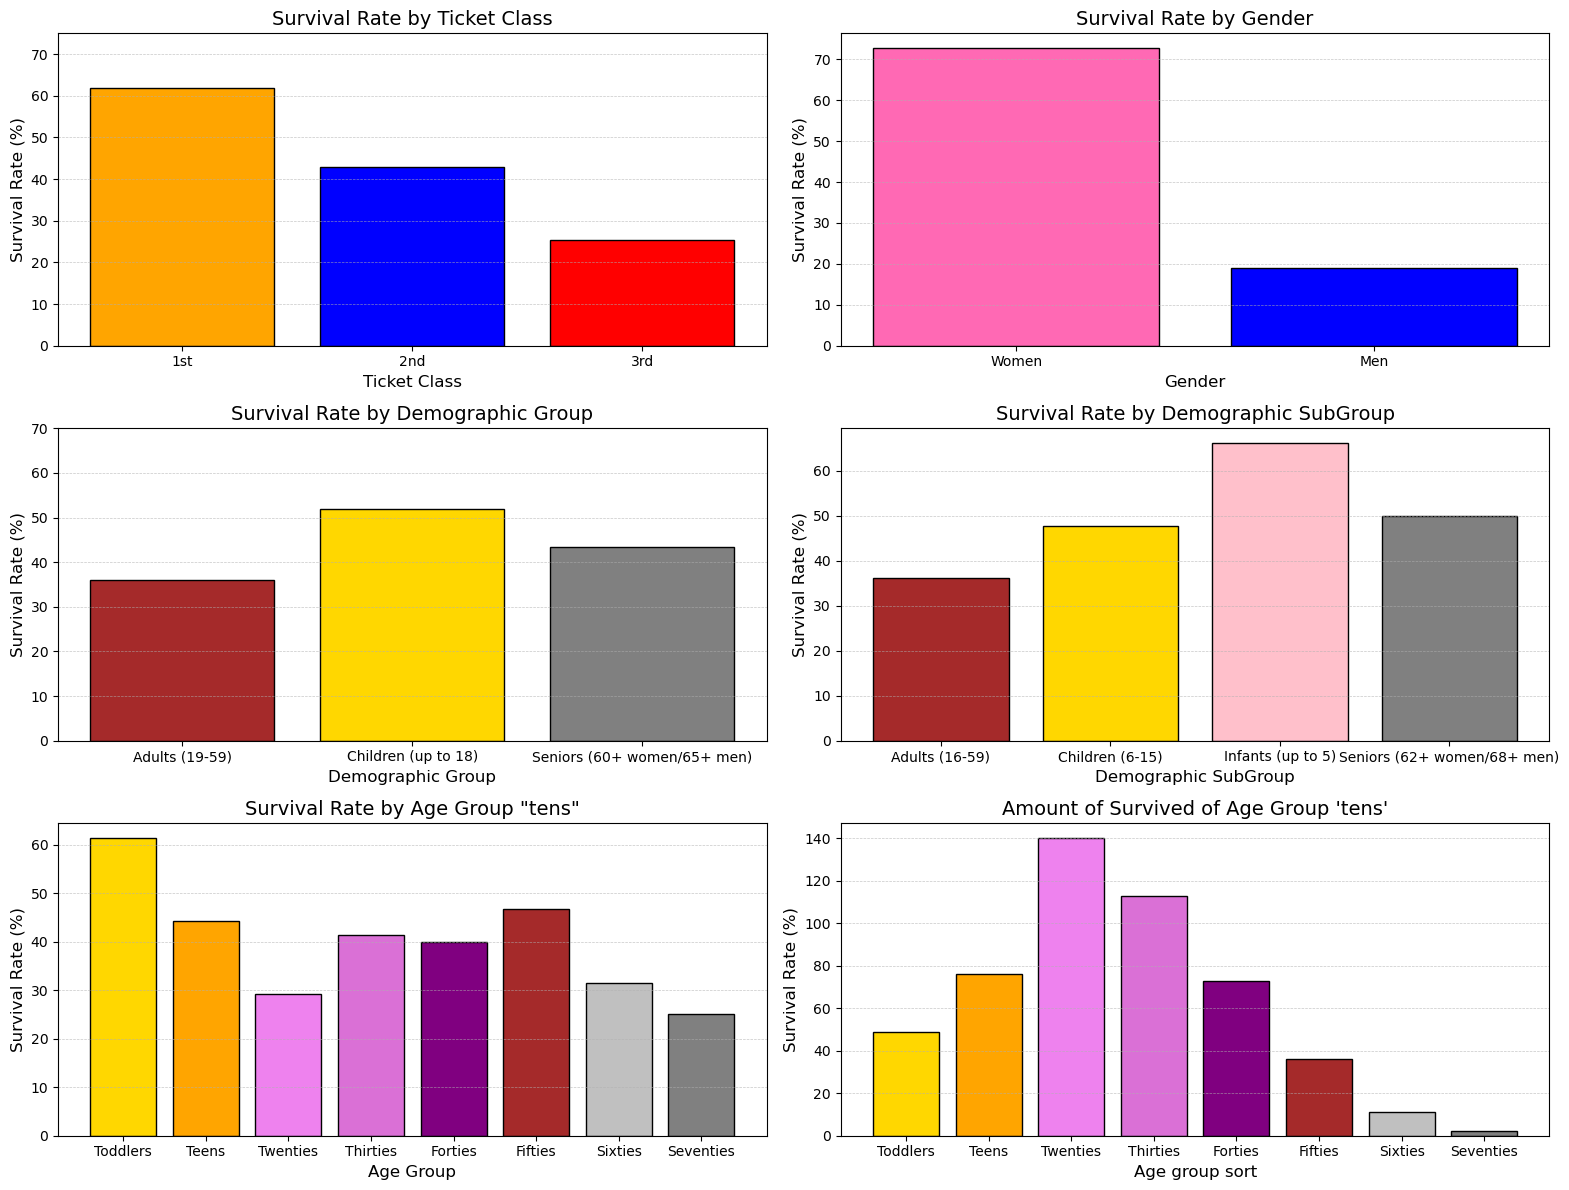

In [62]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Barplot for SR by 'pclass'

axes[0, 0].bar(SR_pclass['Ticket Class'], SR_pclass['Survival rate (%)'], color=['orange', 'blue', 'red'], edgecolor='black')
axes[0, 0].set_title('Survival Rate by Ticket Class', fontsize=14)
axes[0, 0].set_xlabel('Ticket Class', fontsize=12)
axes[0, 0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[0, 0].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
axes[0,0].set_ylim(0, 75)

# Barplot for SR by 'sex'

axes[0, 1].bar(SR_sex['Gender'], SR_sex['Survival rate (%)'], color=['hotpink', 'blue'], edgecolor='black')
axes[0, 1].set_title('Survival Rate by Gender', fontsize=14)
axes[0, 1].set_xlabel('Gender', fontsize=12)
axes[0, 1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[0, 1].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Barplot for SR by 'category'

plot_3 = SR_category
plot_3['Demographic Group'] = SR_category['Demographic Group'].replace(category_replace)

axes[1,0].bar(plot_3['Demographic Group'], plot_3['Survival rate (%)'], color=['brown', 'gold', 'grey'], edgecolor='black')
axes[1,0].set_title('Survival Rate by Demographic Group', fontsize=14)
axes[1,0].set_xlabel('Demographic Group', fontsize=12)
axes[1,0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1,0].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
axes[1,0].set_ylim(0, 70)

# Barplot for SR by 'Subcategory'

plot_4 = SR_subcategory
plot_4['Demographic Subgroup'] = plot_4['Demographic Subgroup'].replace(subcategory_replace)

axes[1,1].bar(plot_4['Demographic Subgroup'], plot_4['Survival rate (%)'], color=['brown', 'gold', 'pink', 'grey'], edgecolor='black')
axes[1,1].set_title('Survival Rate by Demographic SubGroup', fontsize=14)
axes[1,1].set_xlabel('Demographic SubGroup', fontsize=12)
axes[1,1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[1,1].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Barplot for SR by 'Age Group'

axes[2, 0].bar(SR_age_group['Age Group'], SR_age_group['Survival rate (%)'], color=['gold', 'orange', 'violet', 'orchid', 'purple', 'brown', 'silver', 'grey'], edgecolor='black')
axes[2, 0].set_title('Survival Rate by Age Group "tens"', fontsize=14)
axes[2, 0].set_xlabel('Age Group', fontsize=12)
axes[2, 0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[2, 0].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Barplot Amount of survived by 'Age Group'

Amount_age_group = SR_age_group
color_dict_age_group = {'Toddlers': 'gold', 'Teens': 'orange', 'Twenties': 'violet', 'Thirties': 'orchid', 'Forties': 'purple', 'Fifties': 'brown', 'Sixties': 'silver', 'Seventies': 'grey'}
color_pattern_age_group = [color_dict_age_group[age_group_color] for age_group_color in Amount_age_group['Age Group']]

axes[2, 1].bar(Amount_age_group['Age Group'], Amount_age_group['Amount of Survived'], edgecolor='black', color=color_pattern_age_group)
axes[2, 1].set_title("Amount of Survived of Age Group 'tens'", fontsize=14)
axes[2, 1].set_xlabel('Age group sort', fontsize=12)
axes[2, 1].set_ylabel('Survival Rate (%)', fontsize=12)
axes[2, 1].grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
output_path = 'survival_rate_by_age.png'
plt.savefig(output_path, dpi=300)
plt.show()

# Podsumowanie analizy 'SR' z jednym faktorem.
#### 1. Widać wyraźny związek SR z klasą biletu, im wyższa klasa tym wyższy SR ('1st Class'= ok.62% , '3rd Class'= ok. 25%).
#### 2. Jest też bardzo wyraźna 'przewaga' SR dla kobiet, prawie x4 wyższa (72:19) przeżywalność kobiet w stosunku do mężczyzn.
#### 3. Zauważalny jest też znaczący trend wzrostowy w kierunku niższych przedziałów wiekowych (im młodsze dzieci tym wyższy SR).
#### 4. Dla osób po 60. roku życia widoczny jest stopniowy spadek SR.

# EDA krok 4
### Analiza wielowymiarowa (multivariate analysis) dwóch, trzech faktorów.

In [63]:
# SR by ['sex', 'pclass']

grouped = df_work.groupby(['sex', 'pclass'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)

result.rename(columns={
    'sex': 'Gender',
    'pclass': 'Class',
    'Qty': 'Amount of All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)


result['Class'] = result['Class'].replace(pclass_replace)
result['Gender'] = result['Gender'].replace(sex_replace)
desired_order = ['Gender', 'Class', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_sex_pclass = result
SR_sex_pclass

,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
0,Women,1st,96.5,139,144
1,Women,2nd,88.7,94,106
2,Women,3rd,49.1,106,216
3,Men,1st,34.1,61,179
4,Men,2nd,14.6,25,171
5,Men,3rd,15.2,75,493


In [64]:
# SR by 'category', 'pclass'

grouped = df_work.groupby(['category', 'pclass'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)

result.rename(columns={
    'category': 'Demographic Group',
    'pclass': 'Class',
    'Qty': 'Amount of All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)


result['Class'] = result['Class'].replace(pclass_replace)
result['Demographic Group'] = result['Demographic Group'].replace(category_replace)

desired_order = ['Demographic Group', 'Class', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_category_pclass = result
SR_category_pclass #.sort_values(by='Survival rate (%)', ascending=False)

,Demographic Group,Class,Survival rate (%),Amount of Survived,Amount of All
0,Adults (19-59),1st,61.0,178,292
1,Adults (19-59),2nd,37.3,90,241
2,Adults (19-59),3rd,23.4,138,591
3,Children (up to 18),1st,86.7,13,15
4,Children (up to 18),2nd,87.9,29,33
5,Children (up to 18),3rd,36.8,42,114
6,Seniors (60+ women/65+ men),1st,56.2,9,16
7,Seniors (60+ women/65+ men),2nd,0.0,0,3
8,Seniors (60+ women/65+ men),3rd,25.0,1,4


In [65]:
# SR by 'category', 'sex'

grouped = df_work.groupby(['category', 'sex'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)

result.rename(columns={
    'category': 'Demographic Group',
    'sex': 'Gender',
    'Qty': 'Amount of All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)

result['Gender'] = result['Gender'].replace(sex_replace)
result['Demographic Group'] = result['Demographic Group'].replace(category_replace)

desired_order = ['Demographic Group', 'Gender', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_category_sex = result
SR_category_sex

,Demographic Group,Gender,Survival rate (%),Amount of Survived,Amount of All
0,Adults (19-59),Women,73.1,280,383
1,Adults (19-59),Men,17.0,126,741
2,Children (up to 18),Women,69.4,50,72
3,Children (up to 18),Men,37.8,34,90
4,Seniors (60+ women/65+ men),Women,81.8,9,11
5,Seniors (60+ women/65+ men),Men,8.3,1,12


In [66]:
# SR by 'category', 'sex', 'pclass'

grouped = df_work.groupby(['category', 'sex', 'pclass'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)

result.rename(columns={
    'category': 'Demographic Group',
    'sex': 'Gender',
    'pclass': 'Class',
    'Qty': 'Amount of All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)

result['Class'] = result['Class'].replace(pclass_replace)
result['Gender'] = result['Gender'].replace(sex_replace)
desired_order = ['Demographic Group', 'Gender', 'Class', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_category_sex_pclass = result

In [67]:
SR_category_sex_pclass[SR_category_sex_pclass['Class']=='1st'].sort_values(by='Survival rate (%)', ascending=False)

,Demographic Group,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
0,Adults,Women,1st,97.6,124,127
12,Seniors,Women,1st,88.9,8,9
6,Children,Women,1st,87.5,7,8
9,Children,Men,1st,85.7,6,7
3,Adults,Men,1st,32.7,54,165
15,Seniors,Men,1st,14.3,1,7


In [68]:
SR_category_sex_pclass[SR_category_sex_pclass['Class']=='2nd'].sort_values(by='Survival rate (%)', ascending=False)

,Demographic Group,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
7,Children,Women,2nd,100.0,18,18
1,Adults,Women,2nd,87.4,76,87
10,Children,Men,2nd,73.3,11,15
4,Adults,Men,2nd,9.1,14,154
13,Seniors,Women,2nd,0.0,0,1
16,Seniors,Men,2nd,0.0,0,2


In [69]:
SR_category_sex_pclass[SR_category_sex_pclass['Class']=='3rd'].sort_values(by='Survival rate (%)', ascending=False)

,Demographic Group,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
14,Seniors,Women,3rd,100.0,1,1
8,Children,Women,3rd,54.3,25,46
2,Adults,Women,3rd,47.3,80,169
11,Children,Men,3rd,25.0,17,68
5,Adults,Men,3rd,13.7,58,422
17,Seniors,Men,3rd,0.0,0,3


In [70]:
# SR by ['pclass', 'subcategory']

grouped = df_work.groupby(['pclass', 'subcategory'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)

result.rename(columns={
    'subcategory': 'Demographic Subgroup',
    'pclass': 'Class',
    'Qty': 'Amount of All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)


result['Class'] = result['Class'].replace(pclass_replace)
desired_order = ['Demographic Subgroup', 'Class', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_pclass_subcategory = result
SR_pclass_subcategory

,Demographic Subgroup,Class,Survival rate (%),Amount of Survived,Amount of All
0,Adults,1st,61.3,187,305
1,Children,1st,100.0,5,5
2,Infants,1st,66.7,2,3
3,Seniors,1st,60.0,6,10
4,Adults,2nd,37.1,92,248
5,Children,2nd,91.7,11,12
6,Infants,2nd,100.0,16,16
7,Seniors,2nd,0.0,0,1
8,Adults,3rd,23.4,145,619
9,Children,3rd,32.0,16,50


In [71]:
# SR by ['sex', 'subcategory']

grouped = df_work.groupby(['sex', 'subcategory'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)

result.rename(columns={
    'subcategory': 'Demographic Subgroup',
    'sex': 'Gender',
    'Qty': 'Amount of All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)

result['Gender'] = result['Gender'].replace(sex_replace)
desired_order = ['Demographic Subgroup', 'Gender', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_subcategory_sex = result
SR_subcategory_sex

,Demographic Subgroup,Gender,Survival rate (%),Amount of Survived,Amount of All
0,Adults,Women,73.4,296,403
1,Children,Women,60.7,17,28
2,Infants,Women,71.4,20,28
3,Seniors,Women,85.7,6,7
4,Adults,Men,16.6,128,769
5,Children,Men,38.5,15,39
6,Infants,Men,60.7,17,28
7,Seniors,Men,14.3,1,7


In [72]:
# SR by ['subcategory', 'sex', 'pclass']

grouped = df_work.groupby(['subcategory', 'sex', 'pclass'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)

result.rename(columns={
    'subcategory': 'Demographic Subgroup',
    'sex': 'Gender',
    'pclass': 'Class',
    'Qty': 'Amount of All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)

result['Class'] = result['Class'].replace(pclass_replace)
result['Gender'] = result['Gender'].replace(sex_replace)
desired_order = ['Demographic Subgroup', 'Gender', 'Class', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_subcategory_sex_pclass = result

In [73]:
SR_subcategory_sex_pclass[SR_subcategory_sex_pclass['Class']=='1st'].sort_values(by='Survival rate (%)', ascending=False)

,Demographic Subgroup,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
6,Children,Women,1st,100.0,2,2
9,Children,Men,1st,100.0,3,3
15,Infants,Men,1st,100.0,2,2
0,Adults,Women,1st,97.8,132,135
18,Seniors,Women,1st,83.3,5,6
3,Adults,Men,1st,32.4,55,170
20,Seniors,Men,1st,25.0,1,4
12,Infants,Women,1st,0.0,0,1


In [74]:
SR_subcategory_sex_pclass[SR_subcategory_sex_pclass['Class']=='2nd'].sort_values(by='Survival rate (%)', ascending=False)

,Demographic Subgroup,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
7,Children,Women,2nd,100.0,9,9
13,Infants,Women,2nd,100.0,7,7
16,Infants,Men,2nd,100.0,9,9
1,Adults,Women,2nd,86.7,78,90
10,Children,Men,2nd,66.7,2,3
4,Adults,Men,2nd,8.9,14,158
21,Seniors,Men,2nd,0.0,0,1


In [75]:
SR_subcategory_sex_pclass[SR_subcategory_sex_pclass['Class']=='3rd'].sort_values(by='Survival rate (%)', ascending=False)

,Demographic Subgroup,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
19,Seniors,Women,3rd,100.0,1,1
14,Infants,Women,3rd,65.0,13,20
2,Adults,Women,3rd,48.3,86,178
8,Children,Women,3rd,35.3,6,17
17,Infants,Men,3rd,35.3,6,17
11,Children,Men,3rd,30.3,10,33
5,Adults,Men,3rd,13.4,59,441
22,Seniors,Men,3rd,0.0,0,2


In [76]:
# Analyze SR by 'Age Group', 'pclass'

agegroup = pd.cut(df_work['age'], bins=age_bins, right=False, labels=age_labels)  # Create an agegroup
SR_age_group_pclass = df_work.groupby([agegroup,'pclass'])['survived'].agg(
    SR='mean',  
    Amount_Survived='sum',
    Amount_All='count'
).reset_index()

SR_age_group_pclass['pclass'] = SR_age_group_pclass['pclass'].replace(pclass_replace)
SR_age_group_pclass['SR'] = (SR_age_group_pclass['SR'] * 100).round(1)
SR_age_group_pclass.rename(columns={'age': 'Age Group', 'pclass': 'Class', 'SR': 'Survival rate (%)', 'Amount_All':'Amount of All', 'Amount_Survived':'Amount of Survived'}, inplace=True)

In [77]:
SR_age_group_pclass[SR_age_group_pclass['Class']=='1st']

,Age Group,Class,Survival rate (%),Amount of Survived,Amount of All
0,Toddlers,1st,75.0,3,4
3,Teens,1st,88.2,15,17
6,Twenties,1st,71.7,38,53
9,Thirties,1st,70.6,48,68
12,Forties,1st,53.5,54,101
15,Fifties,1st,58.5,31,53
18,Sixties,1st,40.9,9,22
21,Seventies,1st,40.0,2,5


In [78]:
SR_age_group_pclass[SR_age_group_pclass['Class']=='2nd']

,Age Group,Class,Survival rate (%),Amount of Survived,Amount of All
1,Toddlers,2nd,100.0,22,22
4,Teens,2nd,42.9,9,21
7,Twenties,2nd,42.7,38,89
10,Thirties,2nd,37.2,32,86
13,Forties,2nd,36.4,12,33
16,Fifties,2nd,29.4,5,17
19,Sixties,2nd,12.5,1,8
22,Seventies,2nd,0.0,0,1


In [79]:
SR_age_group_pclass[SR_age_group_pclass['Class']=='3rd']

,Age Group,Class,Survival rate (%),Amount of Survived,Amount of All
2,Toddlers,3rd,44.4,24,54
5,Teens,3rd,38.8,52,134
8,Twenties,3rd,18.9,64,339
11,Thirties,3rd,27.7,33,119
14,Forties,3rd,14.3,7,49
17,Fifties,3rd,0.0,0,7
20,Sixties,3rd,20.0,1,5
23,Seventies,3rd,0.0,0,2


In [80]:
# Analyze SR by 'Age Group', 'sex'

agegroup = pd.cut(df_work['age'], bins=age_bins, right=False, labels=age_labels)  # Create an agegroup
SR_age_group_sex = df_work.groupby([agegroup,'sex'])['survived'].agg(
    SR='mean',  
    Amount_Survived='sum',
    Amount_All='count'
).reset_index()

SR_age_group_sex['sex'] = SR_age_group_sex['sex'].replace(sex_replace)
SR_age_group_sex['SR'] = (SR_age_group_sex['SR'] * 100).round(1)
SR_age_group_sex.rename(columns={'age': 'Age Group', 'sex': 'Gender', 'SR': 'Survival rate (%)', 'Amount_All':'Amount of All', 'Amount_Survived':'Amount of Survived'}, inplace=True)

In [81]:
SR_age_group_sex[SR_age_group_sex['Gender']=='Women']

,Age Group,Gender,Survival rate (%),Amount of Survived,Amount of All
0,Toddlers,Women,70.6,24,34
2,Teens,Women,61.7,66,107
4,Twenties,Women,73.9,85,115
6,Thirties,Women,72.2,78,108
8,Forties,Women,80.6,50,62
10,Fifties,Women,92.9,26,28
12,Sixties,Women,81.8,9,11
14,Seventies,Women,100.0,1,1


In [82]:
SR_age_group_sex[SR_age_group_sex['Gender']=='Men']

,Age Group,Gender,Survival rate (%),Amount of Survived,Amount of All
1,Toddlers,Men,54.3,25,46
3,Teens,Men,15.4,10,65
5,Twenties,Men,15.0,55,366
7,Thirties,Men,21.2,35,165
9,Forties,Men,19.0,23,121
11,Fifties,Men,20.4,10,49
13,Sixties,Men,8.3,2,24
15,Seventies,Men,14.3,1,7


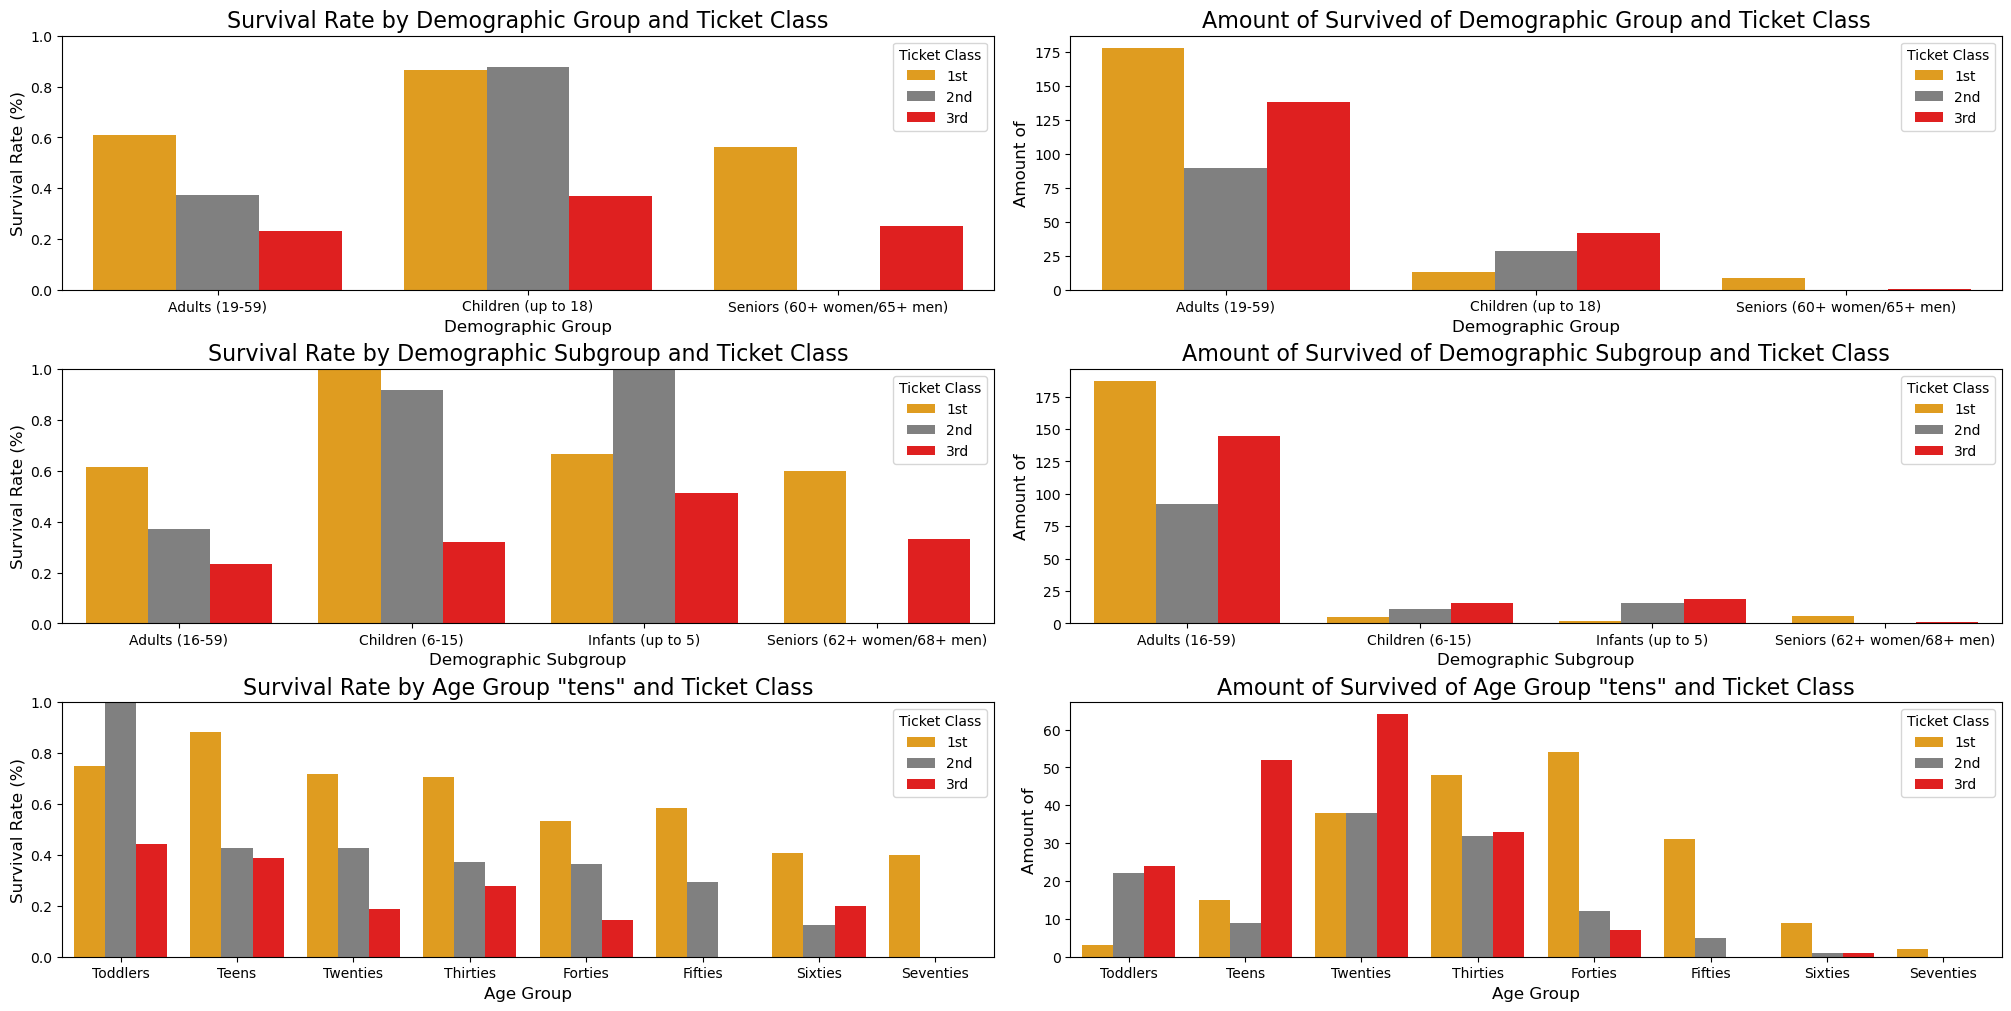

In [83]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 10), constrained_layout=True)

# Plot 1: SR by ['category', 'pclass'] 

Plot_1 = df_work.groupby(['category', 'pclass']).agg(Survival_rate=('survived', 'mean')).reset_index()
Plot_1['category'] = Plot_1['category'].replace(category_replace)
Plot_1['pclass'] = Plot_1['pclass'].replace(pclass_replace)

sns.barplot(
    data=Plot_1,
    x='category',
    y='Survival_rate',
    hue='pclass',
    palette= pclass_colors,
    ax=axes[0,0]
)

axes[0,0].set_title("Survival Rate by Demographic Group and Ticket Class", fontsize=16)
axes[0,0].set_xlabel("Demographic Group", fontsize=12)
axes[0,0].set_ylabel("Survival Rate (%)", fontsize=12)
axes[0,0].legend(title="Ticket Class")
axes[0,0].set_ylim(0, 1)

# Plot 3: SR by ['subcategory', 'pclass']

Plot_3 = df_work.groupby(['subcategory', 'pclass']).agg(Survival_rate=('survived', 'mean')).reset_index()
Plot_3['subcategory'] = Plot_3['subcategory'].replace(subcategory_replace)
Plot_3['pclass'] = Plot_3['pclass'].replace(pclass_replace)

sns.barplot(
    data=Plot_3,
    x='subcategory',
    y='Survival_rate',
    hue='pclass',
    palette= pclass_colors,
    ax=axes[1,0]
)

axes[1,0].set_title("Survival Rate by Demographic Subgroup and Ticket Class", fontsize=16)
axes[1,0].set_xlabel("Demographic Subgroup", fontsize=12)
axes[1,0].set_ylabel("Survival Rate (%)", fontsize=12)
axes[1,0].legend(title="Ticket Class")
axes[1,0].set_ylim(0, 1)

# Plot 5: SR by ['Age Group', 'pclass']

Plot_5 = df_work .groupby([agegroup, 'pclass']).agg(Survival_rate=('survived', 'mean')).reset_index()
Plot_5['pclass'] = Plot_5['pclass'].replace(pclass_replace)

sns.barplot(
    data=Plot_5,
    x='age',
    y='Survival_rate',
    hue='pclass',
    palette= pclass_colors,
    ax=axes[2,0]
)

axes[2,0].set_title('Survival Rate by Age Group "tens" and Ticket Class', fontsize=16)
axes[2,0].set_xlabel('Age Group', fontsize=12)
axes[2,0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[2,0].legend(title="Ticket Class")
axes[2,0].set_ylim(0, 1)

#___________________________________________________________________________________________________________

# Plot 2: Amount of ['category', 'pclass']

Plot_2 = df_work.groupby(['category', 'pclass']).agg(Amount=('survived', 'sum')).reset_index()
Plot_2['category'] = Plot_2['category'].replace(category_replace)
Plot_2['pclass'] = Plot_2['pclass'].replace(pclass_replace)

sns.barplot(
    data=Plot_2,
    x='category',
    y='Amount',
    hue='pclass',
    palette= pclass_colors,
    ax=axes[0,1]
)

axes[0,1].set_title("Amount of Survived of Demographic Group and Ticket Class", fontsize=16)
axes[0,1].set_xlabel("Demographic Group", fontsize=12)
axes[0,1].set_ylabel("Amount of", fontsize=12)
axes[0,1].legend(title="Ticket Class")

# Plot 4: Amount of ['subcategory', 'pclass']

Plot_4 = df_work.groupby(['subcategory', 'pclass']).agg(Amount=('survived', 'sum')).reset_index()
Plot_4['subcategory'] = Plot_4['subcategory'].replace(subcategory_replace)
Plot_4['pclass'] = Plot_4['pclass'].replace(pclass_replace)

sns.barplot(
    data=Plot_4,
    x='subcategory',
    y='Amount',
    hue='pclass',
    palette= pclass_colors,
    ax=axes[1,1]
)

axes[1,1].set_title("Amount of Survived of Demographic Subgroup and Ticket Class", fontsize=16)
axes[1,1].set_xlabel("Demographic Subgroup", fontsize=12)
axes[1,1].set_ylabel("Amount of", fontsize=12)
axes[1,1].legend(title="Ticket Class")

# Plot 6: Amount of ['Age Group', 'pclass']

Plot_6 = df_work .groupby([agegroup, 'pclass']).agg(Amount=('survived', 'sum')).reset_index()
Plot_6['pclass'] = Plot_6['pclass'].replace(pclass_replace)

sns.barplot(
    data=Plot_6,
    x='age',
    y='Amount',
    hue='pclass',
    palette= pclass_colors,
    ax=axes[2,1]
)

axes[2,1].set_title('Amount of Survived of Age Group "tens" and Ticket Class', fontsize=16)
axes[2,1].set_xlabel('Age Group', fontsize=12)
axes[2,1].set_ylabel('Amount of', fontsize=12)
axes[2,1].legend(title="Ticket Class")

#plt.savefig('SR_Amount_of_age_sex.png', dpi=300)

plt.show()

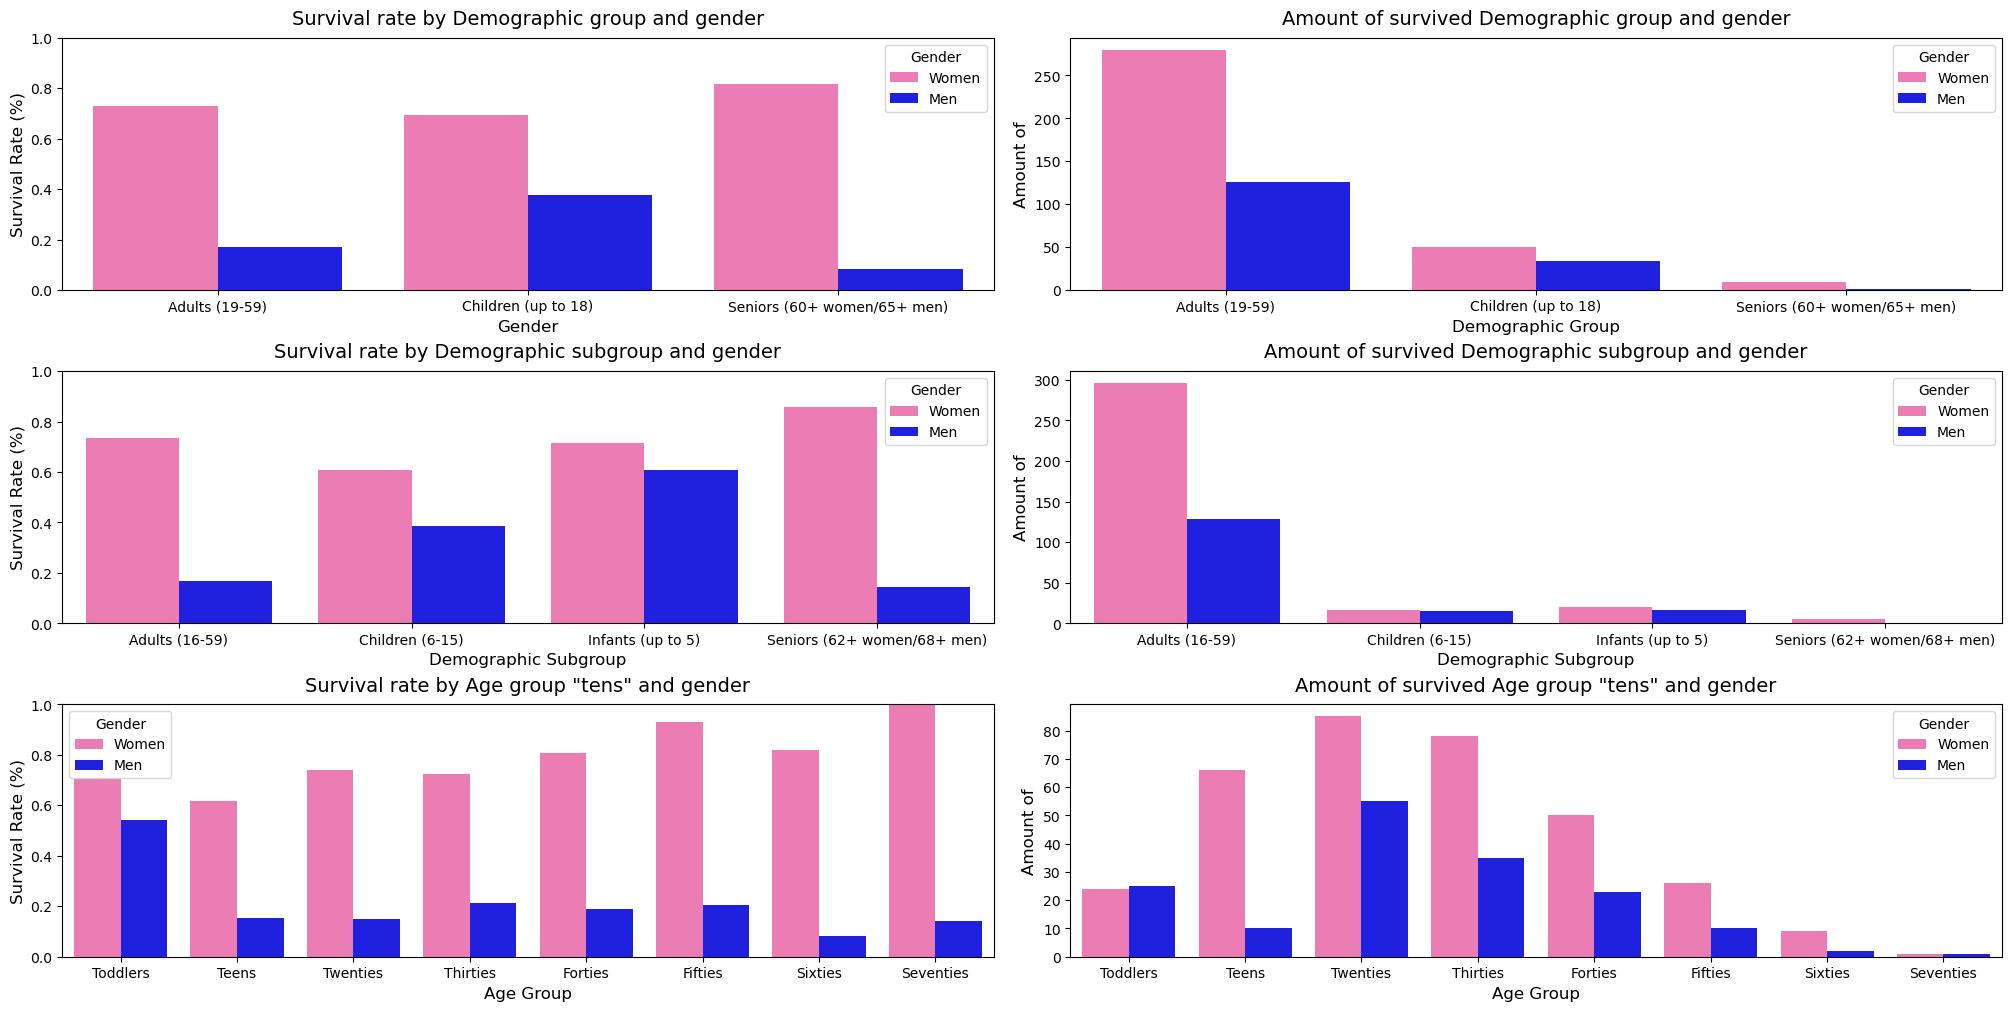

In [84]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 10), constrained_layout=True)

# Plot 1: SR by ['category', 'sex'] 

Plot_1 = df_work.groupby(['category', 'sex']).agg(Survival_rate=('survived', 'mean')).reset_index()
Plot_1['category'] = Plot_1['category'].replace(category_replace)
Plot_1['sex'] = Plot_1['sex'].replace(sex_replace)

sns.barplot(
    data=Plot_1,
    x='category',
    y='Survival_rate',
    hue='sex',
    palette= sex_colors,
    ax=axes[0,0]
)

axes[0,0].set_title("Survival rate by Demographic group and gender", fontsize=14, y=1.02)
axes[0,0].set_xlabel("Gender", fontsize=12, y=1.15)
axes[0,0].set_ylabel("Survival Rate (%)", fontsize=12)
axes[0,0].legend(title="Gender")
axes[0,0].set_ylim(0, 1)

# Plot 3: SR by ['subcategory', 'sex']

Plot_3 = df_work.groupby(['subcategory', 'sex']).agg(Survival_rate=('survived', 'mean')).reset_index()
Plot_3['subcategory'] = Plot_3['subcategory'].replace(subcategory_replace)
Plot_3['sex'] = Plot_3['sex'].replace(sex_replace)

sns.barplot(
    data=Plot_3,
    x='subcategory',
    y='Survival_rate',
    hue='sex',
    palette= sex_colors,
    ax=axes[1,0]
)

axes[1,0].set_title("Survival rate by Demographic subgroup and gender", fontsize=14, y=1.02)
axes[1,0].set_xlabel("Demographic Subgroup", fontsize=12, y=1.15)
axes[1,0].set_ylabel("Survival Rate (%)", fontsize=12)
axes[1,0].legend(title="Gender")
axes[1,0].set_ylim(0, 1)

# Plot 5: SR by ['Age Group', 'sex']

Plot_5 = df_work .groupby([agegroup, 'sex']).agg(Survival_rate=('survived', 'mean')).reset_index()
Plot_5['sex'] = Plot_5['sex'].replace(sex_replace)

sns.barplot(
    data=Plot_5,
    x='age',
    y='Survival_rate',
    hue='sex',
    palette= sex_colors,
    ax=axes[2,0]
)

axes[2,0].set_title('Survival rate by Age group "tens" and gender', fontsize=14, y=1.02)
axes[2,0].set_xlabel('Age Group', fontsize=12, y=1.15)
axes[2,0].set_ylabel('Survival Rate (%)', fontsize=12)
axes[2,0].legend(title="Gender")
axes[2,0].set_ylim(0, 1)

#___________________________________________________________________________________________________________

# Plot 2: Amount of ['category', 'sex']

Plot_4 = df_work.groupby(['category', 'sex']).agg(Amount=('survived', 'sum')).reset_index()
Plot_4['category'] = Plot_4['category'].replace(category_replace)
Plot_4['sex'] = Plot_4['sex'].replace(sex_replace)

sns.barplot(
    data=Plot_4,
    x='category',
    y='Amount',
    hue='sex',
    palette= sex_colors,
    ax=axes[0,1]
)

axes[0,1].set_title("Amount of survived Demographic group and gender", fontsize=14, y=1.02)
axes[0,1].set_xlabel("Demographic Group", fontsize=12, y=1.15)
axes[0,1].set_ylabel("Amount of", fontsize=12)
axes[0,1].legend(title="Gender")

# Plot 4: Amount of ['subcategory', 'sex']

Plot_4 = df_work.groupby(['subcategory', 'sex']).agg(Amount=('survived', 'sum')).reset_index()
Plot_4['subcategory'] = Plot_4['subcategory'].replace(subcategory_replace)
Plot_4['sex'] = Plot_4['sex'].replace(sex_replace)

sns.barplot(
    data=Plot_4,
    x='subcategory',
    y='Amount',
    hue='sex',
    palette= sex_colors,
    ax=axes[1,1]
)

axes[1,1].set_title("Amount of survived Demographic subgroup and gender", fontsize=14, y=1.02)
axes[1,1].set_xlabel("Demographic Subgroup", fontsize=12, y=1.15)
axes[1,1].set_ylabel("Amount of", fontsize=12)
axes[1,1].legend(title="Gender")

# Plot 6: Amount of ['Age Group', 'sex']

Plot_6 = df_work .groupby([agegroup, 'sex']).agg(Amount=('survived', 'sum')).reset_index()
Plot_6['sex'] = Plot_6['sex'].replace(sex_replace)

sns.barplot(
    data=Plot_6,
    x='age',
    y='Amount',
    hue='sex',
    palette= sex_colors,
    ax=axes[2,1]
)

axes[2,1].set_title('Amount of survived Age group "tens" and gender', fontsize=14, y=1.02)
axes[2,1].set_xlabel('Age Group', fontsize=12, y=1.15)
axes[2,1].set_ylabel('Amount of', fontsize=12)
axes[2,1].legend(title="Gender")

#plt.savefig('SR_Amount_of_age_sex.png', dpi=300)

plt.show()

In [85]:
#df_work.to_csv('titanic_df_work.csv', index=False)

# Podsumowanie analizy 'SR' z kilkoma faktorami.
* ### Potwierdziły się obserwacje i trendy z analizy pojedyńczych zmiennych. A przy 'łączeniu zmiennych' dokonuje się synergia i SR rośnie/spada zgodnie z trendem składowych zmiennych
* ### Tzn. przy analizie wpływu 2 czynników na SR, np. `['pclass','sex']` dla kobiet z '1st Class' współczynnik SR podskoczył do ok. 97%, a dla mężczyzn seniorów spadł do ok. 8%
* ### Wystąpiły absolutne 2 skrajności:
    * #### z kobiet/dziewczynek z '1st Class' `zginęła` tylko 5.
    * #### z seniorów mężczyn `przeżył` zaledwie 1.

In [86]:
SR_subcategory_sex_pclass[(SR_subcategory_sex_pclass['Gender']=='Women')]

,Demographic Subgroup,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
0,Adults,Women,1st,97.8,132,135
1,Adults,Women,2nd,86.7,78,90
2,Adults,Women,3rd,48.3,86,178
6,Children,Women,1st,100.0,2,2
7,Children,Women,2nd,100.0,9,9
8,Children,Women,3rd,35.3,6,17
12,Infants,Women,1st,0.0,0,1
13,Infants,Women,2nd,100.0,7,7
14,Infants,Women,3rd,65.0,13,20
18,Seniors,Women,1st,83.3,5,6


In [87]:
SR_subcategory_sex_pclass[(SR_subcategory_sex_pclass['Gender']=='Men')]

,Demographic Subgroup,Gender,Class,Survival rate (%),Amount of Survived,Amount of All
3,Adults,Men,1st,32.4,55,170
4,Adults,Men,2nd,8.9,14,158
5,Adults,Men,3rd,13.4,59,441
9,Children,Men,1st,100.0,3,3
10,Children,Men,2nd,66.7,2,3
11,Children,Men,3rd,30.3,10,33
15,Infants,Men,1st,100.0,2,2
16,Infants,Men,2nd,100.0,9,9
17,Infants,Men,3rd,35.3,6,17
20,Seniors,Men,1st,25.0,1,4


## Analiza wpływu rodziny na SR

In [88]:
# SR by 'family'

grouped = df_work.groupby(['family'])
result = grouped.agg(
    SR=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['SR'] = (result['SR'] * 100).round(1)
result['Qty_survived'] = result['Qty_survived'].round(0)

result.rename(columns={
    'Qty': 'All',
    'SR': 'Survival rate (%)',
    'Qty_survived': 'Survived',
    'family': 'Family'
}, inplace=True)

desired_order = ['Family', 'Survived', 'All', 'Survival rate (%)']
result = result[desired_order]

SR_family = result
SR_family

,Family,Survived,All,Survival rate (%)
0,No,239,790,30.3
1,Yes,261,519,50.3


In [89]:
# SR by 'pclass', 'family'

grouped = df_work.groupby(['pclass', 'family'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)
result['Qty_survived'] = result['Qty_survived'].round(0)

result.rename(columns={
    'pclass': 'Class',
    'Qty': 'All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Survived',
    'family': 'Family'
}, inplace=True)

result['Class'] = result['Class'].replace(pclass_replace)

desired_order = ['Class', 'Family', 'Survived', 'All', 'Survival rate (%)']
result = result[desired_order]

SR_pclass_family = result
#SR_pclass_family[(SR_pclass_family['Gender']=='female')&(SR_pclass_family['All']>3)].sort_values(by='Survival rate (%)', ascending=False)
SR_pclass_family #[SR_pclass_family['All']>2]

,Class,Family,Survived,All,Survival rate (%)
0,1st,No,82,160,51.2
1,1st,Yes,118,163,72.4
2,2nd,No,48,158,30.4
3,2nd,Yes,71,119,59.7
4,3rd,No,109,472,23.1
5,3rd,Yes,72,237,30.4


In [90]:
# SR by 'sex', 'family'

grouped = df_work.groupby(['sex', 'family'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)
result['Qty_survived'] = result['Qty_survived'].round(0)

result.rename(columns={
    'sex': 'Gender',
    'Qty': 'All',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Survived',
    'family': 'Family'
}, inplace=True)

result['Gender'] = result['Gender'].replace({'female': 'Women', 'male': 'Men'})
desired_order = ['Gender', 'Family', 'Survived', 'All', 'Survival rate (%)']
result = result[desired_order]

SR_sex_family = result
SR_sex_family

,Gender,Family,Survived,All,Survival rate (%)
0,Women,No,142,194,73.2
1,Women,Yes,197,272,72.4
2,Men,No,97,596,16.3
3,Men,Yes,64,247,25.9


In [91]:
# SR by 'pclass', 'sex' and 'family'

grouped = df_work.groupby(['pclass', 'sex', 'family'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)
result['Qty_survived'] = result['Qty_survived'].round(0)

result.rename(columns={
    'pclass': 'Class',
    'sex': 'Gender',
    'Qty': 'All',
    'sex': 'Gender',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Survived',
    'family': 'Family'
}, inplace=True)

result['Gender'] = result['Gender'].replace(sex_replace)
result['Class'] = result['Class'].replace(pclass_replace)

desired_order = ['Gender', 'Class', 'Family', 'Survived', 'All', 'Survival rate (%)']
result = result[desired_order]

SR_pclass_sex_family = result
SR_pclass_sex_family #[SR_family_pclass_sex['All']>2]

,Gender,Class,Family,Survived,All,Survival rate (%)
0,Women,1st,No,50,52,96.2
1,Women,1st,Yes,89,92,96.7
2,Men,1st,No,32,108,29.6
3,Men,1st,Yes,29,71,40.8
4,Women,2nd,No,36,42,85.7
5,Women,2nd,Yes,58,64,90.6
6,Men,2nd,No,12,116,10.3
7,Men,2nd,Yes,13,55,23.6
8,Women,3rd,No,56,100,56.0
9,Women,3rd,Yes,50,116,43.1


In [92]:
SR_pclass_family

,Class,Family,Survived,All,Survival rate (%)
0,1st,No,82,160,51.2
1,1st,Yes,118,163,72.4
2,2nd,No,48,158,30.4
3,2nd,Yes,71,119,59.7
4,3rd,No,109,472,23.1
5,3rd,Yes,72,237,30.4


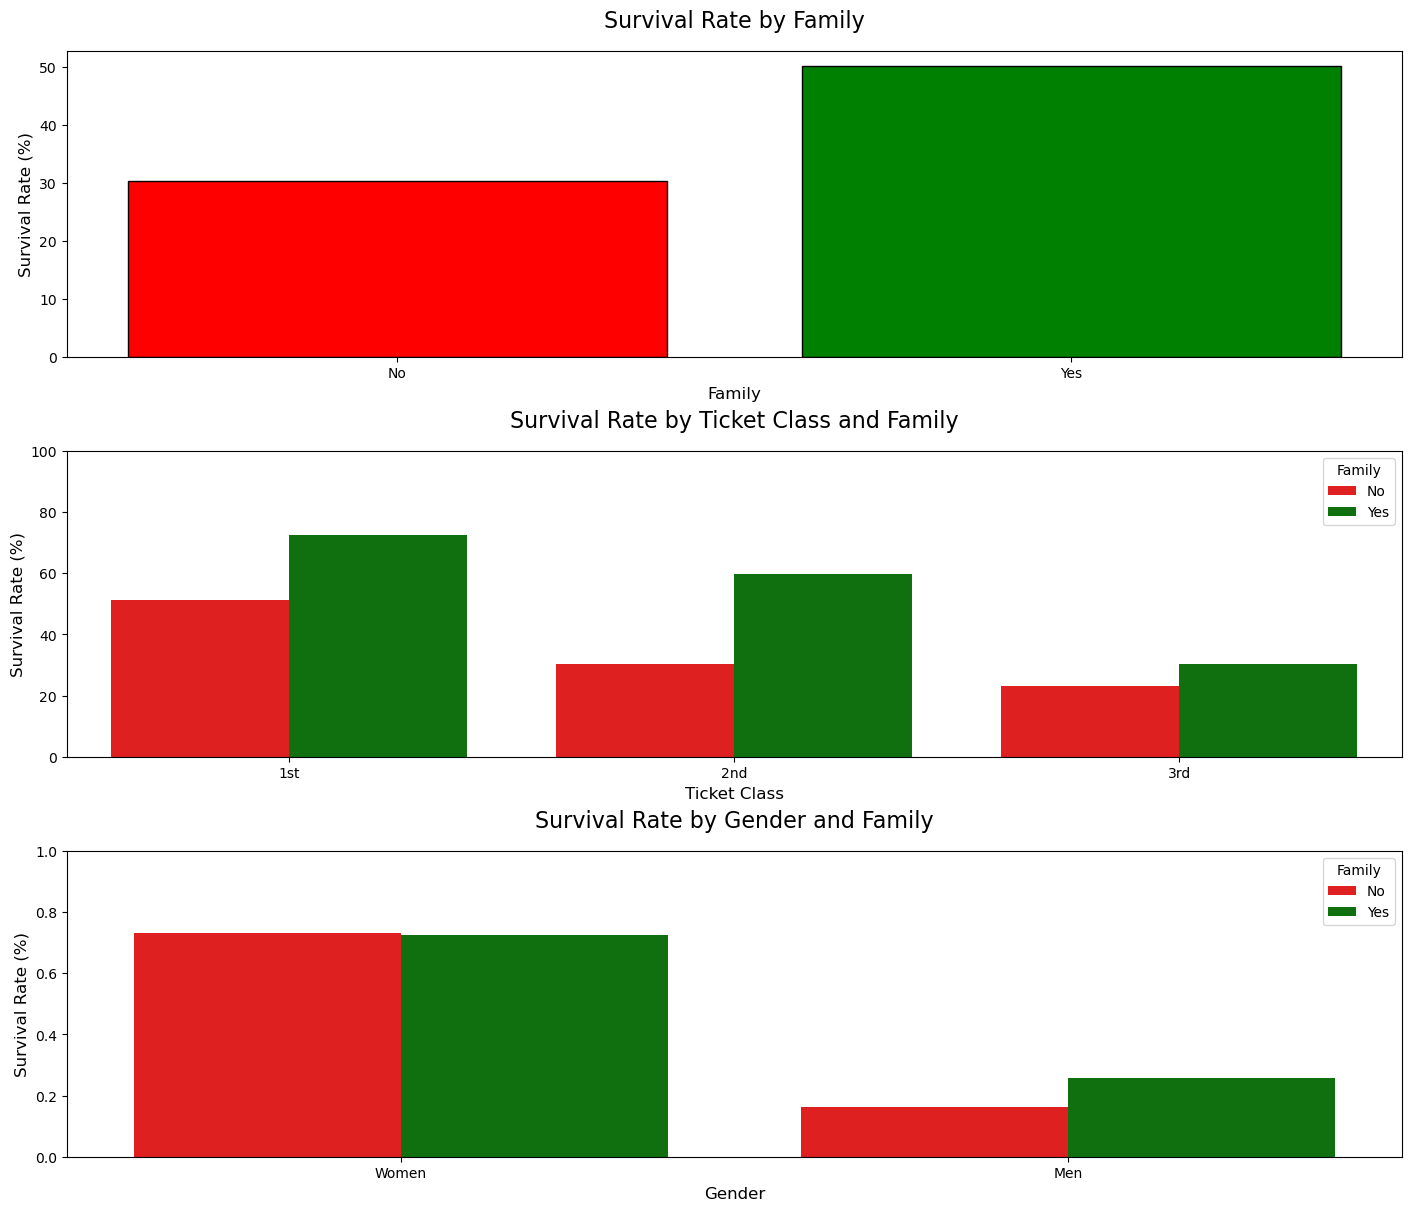

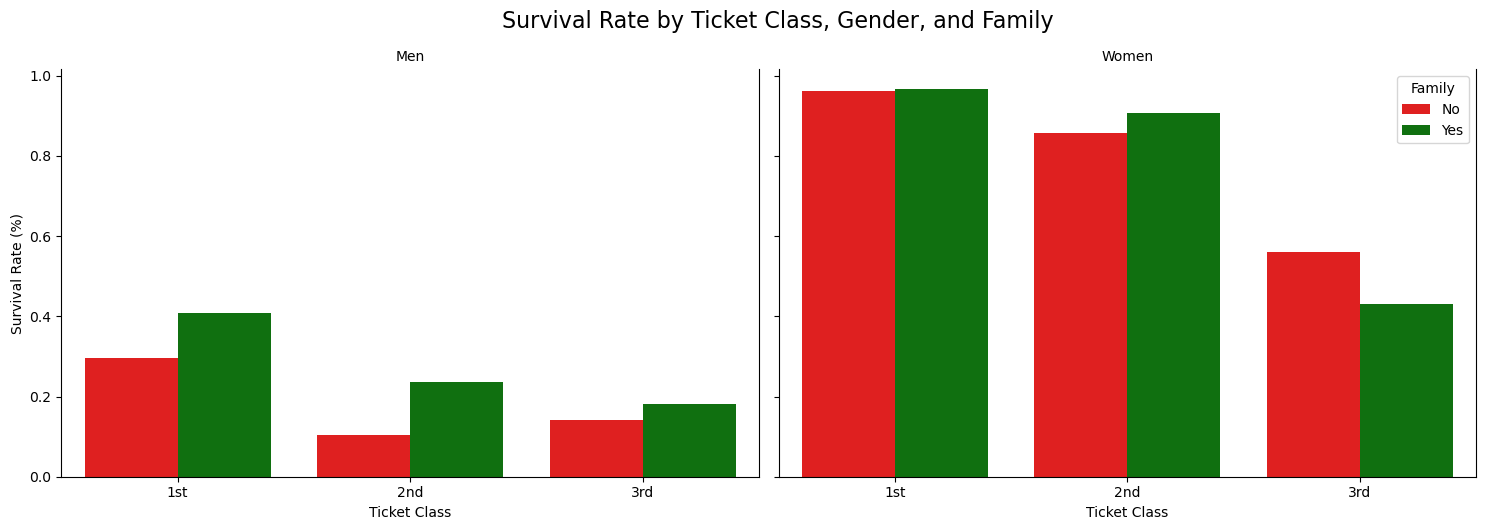

In [93]:
# Create subplots

fig, axes = plt.subplots(3, 1, figsize=(14, 12), constrained_layout=True)

# Barplot for SR by 'family'

axes[0].bar(SR_family['Family'], SR_family['Survival rate (%)'], color=['red', 'green'], edgecolor='black')
axes[0].set_title('Survival Rate by Family', fontsize=16, y=1.05)
axes[0].set_xlabel('Family', fontsize=12)
axes[0].set_ylabel('Survival Rate (%)', fontsize=12)

# Plot 1: SR by ['pclass', 'family']

sns.barplot(
    data= SR_pclass_family,
    x='Class',
    y='Survival rate (%)',
    hue='Family',
    palette=family_colors,
    ax=axes[1]
)

axes[1].set_title("Survival Rate by Ticket Class and Family", fontsize=16, y=1.05)
axes[1].set_xlabel("Ticket Class", fontsize=12)
axes[1].set_ylabel("Survival Rate (%)", fontsize=12)
axes[1].legend(title="Family")
axes[1].set_ylim(0, 100)

# Plot 2: SR by ['sex', 'family']

Plot_2 = df_work.groupby(['sex', 'family']).agg(Survival_rate=('survived', 'mean')).reset_index()
Plot_2['sex'] = Plot_2['sex'].replace(sex_replace)

sns.barplot(
    data= Plot_2,
    x='sex',
    y='Survival_rate',
    hue='family',
    palette=family_colors,
    ax=axes[2]
)

axes[2].set_title("Survival Rate by Gender and Family", fontsize=16, y=1.05)
axes[2].set_xlabel("Gender", fontsize=12)
axes[2].set_ylabel("Survival Rate (%)", fontsize=12)
axes[2].legend(title="Family")
axes[2].set_ylim(0, 1)

# Plot 3: ['pclass', 'sex', 'family'] amount of survived

pclass_catplot = df_work['pclass'].replace(pclass_replace)
sex_catplot = df_work['sex'].replace(sex_replace)

Plot_psf = sns.catplot(
    data=df_work.groupby([pclass_catplot, sex_catplot, 'family']).agg(Survival_rate=('survived', 'mean')).reset_index(),
    x='pclass',
    y='Survival_rate',
    hue='family',
    col='sex',
    kind='bar',
    palette=family_colors,
    height=5,
    aspect=1.5
)

Plot_psf.fig.suptitle("Survival Rate by Ticket Class, Gender, and Family", fontsize=16, y=1.05)
Plot_psf.set(xlabel="Ticket Class", ylabel="Survival Rate (%)")
Plot_psf.set_titles("{col_name}")
Plot_psf.despine(left=False, right=False)
Plot_psf.legend.remove()
plt.legend(title='Family')

plt.show()

In [94]:
# SR by ['category','family']

grouped = df_work.groupby(['category','family'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)
result['Qty_survived'] = result['Qty_survived'].round(0)

# Rename columns for better readability
result.rename(columns={
    'category': 'Category',
    'Qty': 'Amount of All',
    'family': 'Family',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)

# Reorder columns
desired_order = ['Category', 'Family', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_category_family = result
SR_category_family

,Category,Family,Survival rate (%),Amount of Survived,Amount of All
0,Adults,No,29.8,222,745
1,Adults,Yes,48.5,184,379
2,Children,No,39.4,13,33
3,Children,Yes,55.0,71,129
4,Seniors,No,33.3,4,12
5,Seniors,Yes,54.5,6,11


In [95]:
# Groupby 'subcategory' and 'family' and calculate statistics

grouped = df_work.groupby(['subcategory','family'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)
result['Qty_survived'] = result['Qty_survived'].round(0)

# Rename columns for better readability
result.rename(columns={
    'subcategory': 'Subcategory',
    'Qty': 'Amount of All',
    'family': 'Family',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)

# Reorder columns
desired_order = ['Subcategory', 'Family', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_subcategory_family = result
SR_subcategory_family

,Subcategory,Family,Survival rate (%),Amount of Survived,Amount of All
0,Adults,No,29.8,230,772
1,Adults,Yes,48.5,194,400
2,Children,No,55.6,5,9
3,Children,Yes,46.6,27,58
4,Infants,No,100.0,1,1
5,Infants,Yes,65.5,36,55
6,Seniors,No,37.5,3,8
7,Seniors,Yes,66.7,4,6


In [96]:
# SR by ['category','sex','pclass','family']

grouped = df_work.groupby(['category','sex', 'pclass', 'family'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)
result['Qty_survived'] = result['Qty_survived'].round(0)

result.rename(columns={
    'category': 'Category',
    'sex': 'Gender',
    'pclass': 'Class', 
    'Qty': 'Amount of All',
    'family': 'Family',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)

result['Gender'] = result['Gender'].replace(sex_replace)
result['Class'] = result['Class'].replace(pclass_replace)

# Reorder columns
desired_order = ['Category', 'Gender', 'Class', 'Family', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_category_family = result
SR_category_family[SR_category_family['Gender']=='Women']

,Category,Gender,Class,Family,Survival rate (%),Amount of Survived,Amount of All
0,Adults,Women,1st,No,95.9,47,49
1,Adults,Women,1st,Yes,98.7,77,78
2,Adults,Women,2nd,No,84.6,33,39
3,Adults,Women,2nd,Yes,89.6,43,48
4,Adults,Women,3rd,No,53.9,48,89
5,Adults,Women,3rd,Yes,40.0,32,80
12,Children,Women,1st,No,100.0,1,1
13,Children,Women,1st,Yes,85.7,6,7
14,Children,Women,2nd,No,100.0,3,3
15,Children,Women,2nd,Yes,100.0,15,15


In [97]:
SR_category_family[SR_category_family['Gender']=='Men']

,Category,Gender,Class,Family,Survival rate (%),Amount of Survived,Amount of All
6,Adults,Men,1st,No,30.1,31,103
7,Adults,Men,1st,Yes,37.1,23,62
8,Adults,Men,2nd,No,10.9,12,110
9,Adults,Men,2nd,Yes,4.5,2,44
10,Adults,Men,3rd,No,14.4,51,355
11,Adults,Men,3rd,Yes,10.4,7,67
18,Children,Men,1st,No,0.0,0,1
19,Children,Men,1st,Yes,100.0,6,6
20,Children,Men,2nd,No,0.0,0,4
21,Children,Men,2nd,Yes,100.0,11,11


In [98]:
# SR by agegroup and 'family'

grouped = df_work.groupby([agegroup,'family'])
result = grouped.agg(
    survival_rate=('survived', 'mean'),
    Qty=('survived', 'count'),
    Qty_survived=('survived', 'sum')
).reset_index()

result['survival_rate'] = (result['survival_rate'] * 100).round(1)
result['Qty_survived'] = result['Qty_survived'].round(0)

# Rename columns for better readability
result.rename(columns={
    'age': 'Age Group',
    'Qty': 'Amount of All',
    'family': 'Family',
    'survival_rate': 'Survival rate (%)',
    'Qty_survived': 'Amount of Survived'
}, inplace=True)

# Reorder columns
desired_order = ['Age Group', 'Family', 'Survival rate (%)', 'Amount of Survived', 'Amount of All']
result = result[desired_order]

SR_agegroup_family = result
SR_agegroup_family

,Age Group,Family,Survival rate (%),Amount of Survived,Amount of All
0,Toddlers,No,50.0,1,2
1,Toddlers,Yes,61.5,48,78
2,Teens,No,45.3,39,86
3,Teens,Yes,43.0,37,86
4,Twenties,No,23.2,82,354
5,Twenties,Yes,45.7,58,127
6,Thirties,No,37.1,65,175
7,Thirties,Yes,49.0,48,98
8,Forties,No,30.3,33,109
9,Forties,Yes,54.1,40,74


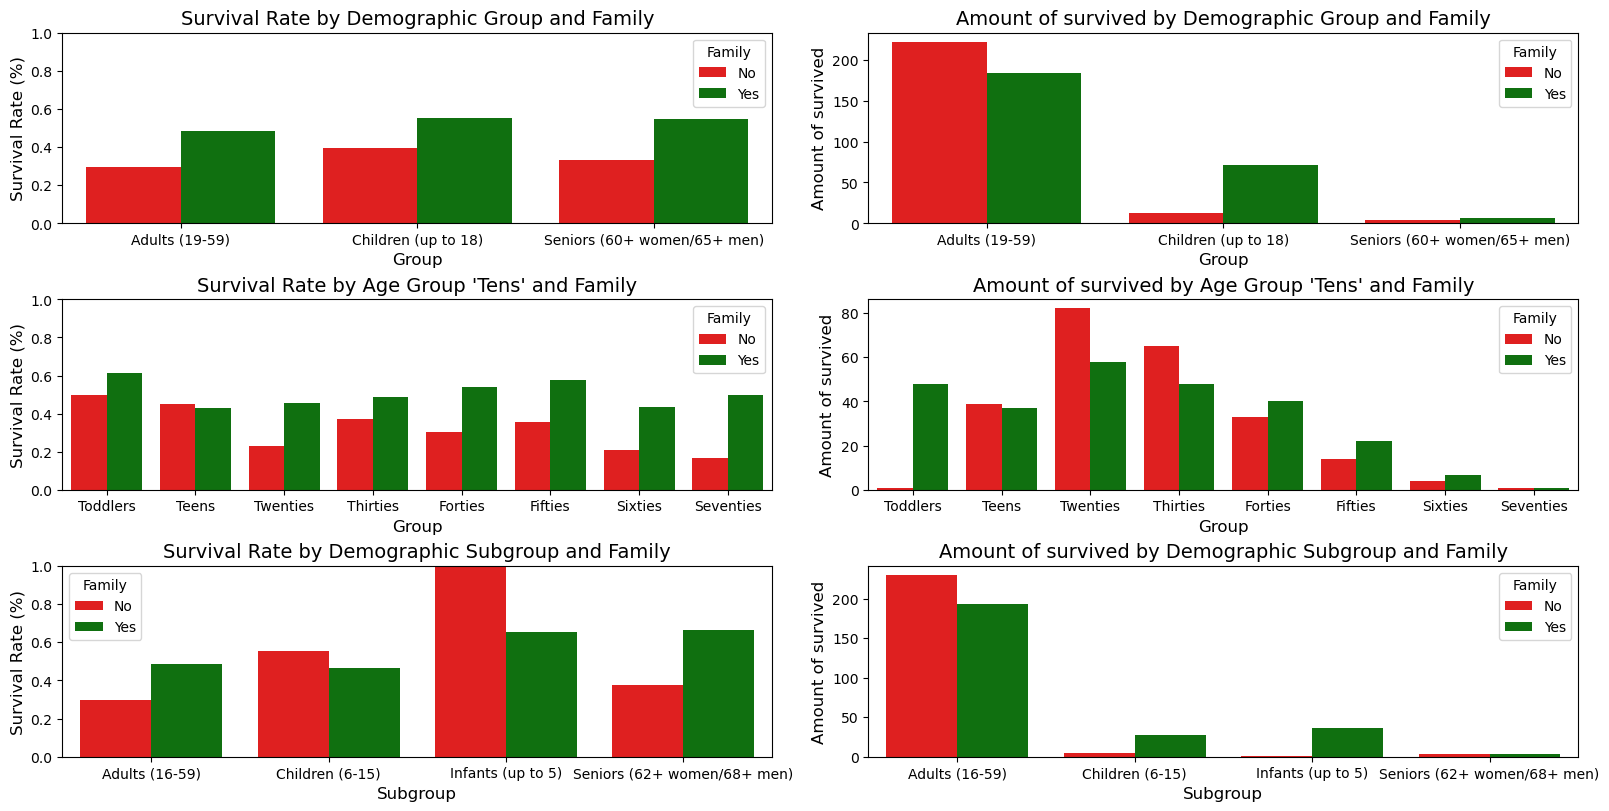

In [99]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 8), constrained_layout=True)

# Plot 0: ['category', 'family'] SR

plot_0 = df_work.groupby(['category', 'family']).agg(Survival_rate=('survived', 'mean')).reset_index()
plot_0['category'] = plot_0['category'].replace(category_replace)

sns.barplot(
    data= plot_0,
    x='category',
    y='Survival_rate',
    hue='family',
    palette=family_colors,
    ax=axes[0,0]
)
axes[0,0].set_title("Survival Rate by Demographic Group and Family", fontsize=14)
axes[0,0].set_xlabel("Group", fontsize=12)
axes[0,0].set_ylabel("Survival Rate (%)", fontsize=12)
axes[0,0].legend(title="Family")
axes[0,0].set_ylim(0, 1)

# Plot 01: ['category', 'family'] Amount of survived

plot_01 = df_work.groupby(['category', 'family']).agg(Amount_survived=('survived', 'sum')).reset_index()
plot_01['category'] = plot_01['category'].replace(category_replace)

sns.barplot(
    data= plot_01,
    x='category',
    y='Amount_survived',
    hue='family',
    palette=family_colors,
    ax=axes[0,1]
)
axes[0,1].set_title("Amount of survived by Demographic Group and Family", fontsize=14)
axes[0,1].set_xlabel("Group", fontsize=12)
axes[0,1].set_ylabel("Amount of survived", fontsize=12)
axes[0,1].legend(title="Family")

# Plot 1: [agegroup, 'family'] SR

plot_1 = df_work.groupby([agegroup, 'family']).agg(Survival_rate=('survived', 'mean')).reset_index()

sns.barplot(
    data= plot_1,
    x='age',
    y='Survival_rate',
    hue='family',
    palette=family_colors,
    ax=axes[1,0]
)
axes[1,0].set_title("Survival Rate by Age Group 'Tens' and Family", fontsize=14)
axes[1,0].set_xlabel("Group", fontsize=12)
axes[1,0].set_ylabel("Survival Rate (%)", fontsize=12)
axes[1,0].legend(title="Family")
axes[1,0].set_ylim(0, 1)

# Plot 11: [agegroup, 'family'] Amount of survived

plot_11 = df_work.groupby([agegroup, 'family']).agg(Amount_survived=('survived', 'sum')).reset_index()

sns.barplot(
    data= plot_11,
    x='age',
    y='Amount_survived',
    hue='family',
    palette=family_colors,
    ax=axes[1,1]
)
axes[1,1].set_title("Amount of survived by Age Group 'Tens' and Family", fontsize=14)
axes[1,1].set_xlabel("Group", fontsize=12)
axes[1,1].set_ylabel("Amount of survived", fontsize=12)
axes[1,1].legend(title="Family")

# Plot 2: ['category', 'family'] SR

plot_20 = df_work.groupby(['subcategory', 'family']).agg(Survival_rate=('survived', 'mean')).reset_index()
plot_20['subcategory'] = plot_20['subcategory'].replace(subcategory_replace)

sns.barplot(
    data= plot_20,
    x='subcategory',
    y='Survival_rate',
    hue='family',
    palette=family_colors,
    ax=axes[2,0]
)
axes[2,0].set_title("Survival Rate by Demographic Subgroup and Family", fontsize=14)
axes[2,0].set_xlabel("Subgroup", fontsize=12)
axes[2,0].set_ylabel("Survival Rate (%)", fontsize=12)
axes[2,0].legend(title="Family")
axes[2,0].set_ylim(0, 1)

# Plot 21: ['category', 'family'] Amount of survived

plot_21 = df_work.groupby(['subcategory', 'family']).agg(Amount_survived=('survived', 'sum')).reset_index()
#plot_21 = plot_21[plot_21['subcategory']!='Adults']
plot_21['subcategory'] = plot_21['subcategory'].replace(subcategory_replace)

sns.barplot(
    data= plot_21,
    x='subcategory',
    y='Amount_survived',
    hue='family',
    palette=family_colors,
    ax=axes[2,1]
)
axes[2,1].set_title("Amount of survived by Demographic Subgroup and Family", fontsize=14)
axes[2,1].set_xlabel("Subgroup", fontsize=12)
axes[2,1].set_ylabel("Amount of survived", fontsize=12)
axes[2,1].legend(title="Family")

plt.show()

# Podsumowanie analizy wpływu `rodziny` na `SR`.
### 1. Ogólny współczynnik `SR` z uwzględnieniem faktu posiadania rodziny pokazuje pozytywny wpływ, wyższy `SR` dla pasażerów z rodziną.
### 2. Wpływ posiadania rodziny z podziałem, na różnorodne 'grupy': `wiekowe`, `płci`, `klasy biletów` wykazuje różne wyniki (bez wyraźnych trendów). 

# Podsumowanie

### 1. Generalne obserwacje
- **Ticket Class (Pclass):**
  - **1st class:** Najwyższy współczynnik `SR`.
  - **3rd class:** Najniższy współczynnik `SR`.
- **Gender (Sex):**
  - **Women** znacznie wyższy współczynnik `SR` niż mężczyźni.
  - **Men** byli najbardziej narażeni na śmierć, szczególnie `seniorzy`.
- **Group/Subgroup:**
  - **Infants (`up to 5`)** miały wysoki wskaźnik przeżywalności, szczególnie w `1 i 2 klasie`.
  - **Seniors (60+)** mieli jeden z najniższych wskaźników przeżywalności, szczególnie w `3 klasie`.

### 2. Wizualizacje i statystyki

##### - Wykresy pokazały kluczowe różnice w przeżywalności między grupami wiekowymi w zależności od klasy biletu i płci.
##### - Uwydatnił się udział poszczególnych grup w przeżywalności dla różnych klas biletu i płci.
##### - Podkreślono kluczowe różnice we wskaźnikach przeżycia między grupami i podgrupami na podstawie klasy biletu i płci.
##### - Pokazano zależności między `grupami` i `klasą` pod względem przeżycia.

### 3. Dodatkowe analizy

##### - Dane są wystarczające do analizy przeżywalności, jednak moglibyśmy wziąć pod uwagę dodatkowe informacje (których niestety sporo brakuje i nie trudno je odtworzyć), np. szczegóły dot. kabin, aby lepiej zbadać wpływ 'umiejscowienia' pasażerów na przeżycie.

### 4. Outliers, wartości odstające

##### - Nie znaleziono wartości odstających, które wymagałyby usunięcia.